# Sistema de Recomenda√ß√£o Not√≠cias

## Dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Leitura de Dados

In [ ]:
# Carregando os datasets de treino de usu√°rios
df_user_raw_1 = pd.read_csv(
    "script_shared/data/raw/files/treino/treino_parte1.csv", delimiter=","
)
df_user_raw_2 = pd.read_csv(
    "script_shared/data/raw/files/treino/treino_parte2.csv", delimiter=","
)
df_user_raw_3 = pd.read_csv(
    "script_shared/data/raw/files/treino/treino_parte3.csv", delimiter=","
)
df_user_raw_4 = pd.read_csv(
    "script_shared/data/raw/files/treino/treino_parte4.csv", delimiter=","
)
df_user_raw_5 = pd.read_csv(
    "script_shared/data/raw/files/treino/treino_parte5.csv", delimiter=","
)
df_user_raw_6 = pd.read_csv(
    "script_shared/data/raw/files/treino/treino_parte6.csv", delimiter=","
)

df_user_raw = pd.concat(
    [
        df_user_raw_1,
        df_user_raw_2,
        df_user_raw_3,
        df_user_raw_4,
        df_user_raw_5,
        df_user_raw_6,
    ],
    ignore_index=True,
)

In [ ]:
# Carregando datasets de itens

df_item_1 = pd.read_csv(
    "script_shared/data/raw/itens/itens/itens-parte1.csv", delimiter=","
)
df_item_2 = pd.read_csv(
    "script_shared/data/raw/itens/itens/itens-parte2.csv", delimiter=","
)
df_item_3 = pd.read_csv(
    "script_shared/data/raw/itens/itens/itens-parte3.csv", delimiter=","
)

df_item = pd.concat([df_item_1, df_item_2, df_item_3], ignore_index=True)

### Visualiza√ß√£o dos Dados

In [31]:
df_user_raw.head(1)

userId    userType  historySize  \
0  f98d1132f60d46883ce49583257104d15ce723b3bbda21...  Non-Logged            3   

                                             history  \
0  c8aab885-433d-4e46-8066-479f40ba7fb2, 68d2039c...   

                              timestampHistory numberOfClicksHistory  \
0  1657146417045, 1657146605778, 1657146698738            76, 38, 41   

     timeOnPageHistory scrollPercentageHistory pageVisitsCountHistory  \
0  20380, 21184, 35438      50.3, 18.18, 16.46                2, 1, 1   

                          timestampHistory_new  
0  1657146417045, 1657146605778, 1657146698738

In [32]:
df_item.head()

page  \
0  13db0ab1-eea2-4603-84c4-f40a876c7400   
1  92907b73-5cd3-4184-8d8c-e206aed2bf1c   
2  61e07f64-cddf-46f2-b50c-ea0a39c22050   
3  30e2e6c5-554a-48ed-a35f-6c6691c8ac9b   
4  9dff71eb-b681-40c7-ac8d-68017ac36675   

                                                 url  \
0  http://g1.globo.com/am/amazonas/noticia/2022/0...   
1  http://g1.globo.com/pa/santarem-regiao/noticia...   
2  http://g1.globo.com/mundo/noticia/2022/07/08/e...   
3  http://g1.globo.com/politica/noticia/2021/09/0...   
4  http://g1.globo.com/politica/noticia/2021/09/1...   

                      issued                   modified  \
0  2022-06-18 20:37:45+00:00  2023-04-15 00:02:08+00:00   
1  2019-06-20 17:19:52+00:00  2023-06-16 20:19:15+00:00   
2  2022-07-08 08:55:52+00:00  2023-04-15 04:25:39+00:00   
3  2021-09-09 19:06:46+00:00  2023-06-07 17:44:54+00:00   
4  2021-09-15 19:16:13+00:00  2023-06-07 17:43:39+00:00   

                                               title  \
0  Caso Bruno e Dom: 3¬∫ suspeito tem pris√£o tempo...   
1  Linguajar dos santarenos √© diferenciado e chei...   
2  Ex-premi√™ Shinzo Abe morre ap√≥s ser baleado no...   
3  Relator no STF, Fachin vota contra marco tempo...   
4  \nAp√≥s 2 votos, pedido de vista suspende julga...   

                                                body  \
0  Ap√≥s audi√™ncia de cust√≥dia, a Justi√ßa do Amazo...   
1  Vista a√©rea de Santar√©m\n√Ådrio Denner/ AD Prod...   
2  Novo v√≠deo mostra que assassino de Shinzo Abe ...   
3  Relator no STF, Fachin vota contra marco tempo...   
4  Ap√≥s um pedido de vista (mais tempo para an√°li...   

                                             caption  
0  Jeferson da Silva Lima foi escoltado por agent...  
1  As express√µes santarenas n√£o significam apenas...  
2  Ex-primeiro-ministro foi atingido por tiros de...  
3  Ministro defendeu que posse ind√≠gena √© diferen...  
4  Pelo marco temporal, √≠ndios s√≥ podem reivindic...

#### Data Clean - Staging

In [ ]:
df_user_stage = df_user_raw.copy()

# Separando as colunas que possui lista de itens em v√°rias linhas para cada userId
list_columns = [
    "history",
    "timestampHistory",
    "numberOfClicksHistory",
    "timeOnPageHistory",
    "scrollPercentageHistory",
    "pageVisitsCountHistory",
    "timestampHistory_new",
]

for col in list_columns:
    df_user_stage[col] = df_user_stage[col].str.split(",")

# Explode para expandir as listas em v√°rias linhas
df_user_stage = df_user_stage.explode(list_columns)

# Resetar o √≠ndice
df_user_stage = df_user_stage.reset_index(drop=True)

# Salvar o DataFrame em um arquivo CSV
df_user_stage.to_csv("script_shared/data/stage/stage_user_training.csv", index=False)

In [ ]:
df_user_stage = pd.read_csv(
    "script_shared/data/stage/stage_user_training.csv", delimiter=","
)

In [35]:
df_user_stage.head()

userId    userType  historySize  \
0  f98d1132f60d46883ce49583257104d15ce723b3bbda21...  Non-Logged            3   
1  f98d1132f60d46883ce49583257104d15ce723b3bbda21...  Non-Logged            3   
2  f98d1132f60d46883ce49583257104d15ce723b3bbda21...  Non-Logged            3   
3  2c1080975e257ed630e26679edbe4d5c850c65f3e09f65...  Non-Logged           60   
4  2c1080975e257ed630e26679edbe4d5c850c65f3e09f65...  Non-Logged           60   

                                 history  timestampHistory  \
0   c8aab885-433d-4e46-8066-479f40ba7fb2     1657146417045   
1   68d2039c-c9aa-456c-ac33-9b2e8677fba7     1657146605778   
2   13e423ce-1d69-4c78-bc18-e8c8f7271964     1657146698738   
3   3325b5a1-979a-4cb3-82b6-63905c9edbe8     1656684240278   
4   fe856057-f97d-419f-ab1c-97c5c3e0719c     1656761266729   

   numberOfClicksHistory  timeOnPageHistory  scrollPercentageHistory  \
0                     76              20380                    50.30   
1                     38              21184                    18.18   
2                     41              35438                    16.46   
3                      7               6049                    25.35   
4                     80             210489                    45.66   

   pageVisitsCountHistory  timestampHistory_new  
0                       2         1657146417045  
1                       1         1657146605778  
2                       1         1657146698738  
3                       1         1656684240278  
4                       1         1656761266729

### An√°lise Explorat√≥ria EDA

In [36]:
def human_readable_number(value):
    """Converte n√∫meros grandes para formatos mais leg√≠veis."""
    if pd.isna(value):
        return "Sem dados"
    elif value >= 1e6:
        return f"{value / 1e6:.2f}M"
    elif value >= 1e3:
        return f"{value / 1e3:.2f}K"
    return f"{value:.2f}"


def format_timestamp(ts):
    """Converte timestamps Unix para formato de data leg√≠vel."""
    return (
        pd.to_datetime(ts, unit="ms").strftime("%Y-%m-%d")
        if not pd.isna(ts)
        else "Sem dados"
    )


def eda_users_items_plot(df_user, df_item):
    """Realiza uma an√°lise explorat√≥ria dos DataFrames de usu√°rios e itens com Gr√°ficos."""

    # Configura√ß√£o geral de estilo
    sns.set(style="whitegrid")

    # Separando usu√°rios logados e n√£o logados
    df_logged = df_user[df_user["userType"] == "Logged"]
    df_non_logged = df_user[df_user["userType"] == "Non-Logged"]

    # Distribui√ß√£o de usu√°rios logados vs. n√£o logados
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_user, x="userType", palette="pastel")
    plt.title("Distribui√ß√£o de Usu√°rios Logados vs. N√£o Logados")
    plt.xlabel("Tipo de Usu√°rio")
    plt.ylabel("Contagem")
    plt.show()

    # Distribui√ß√£o do n√∫mero de not√≠cias lidas
    for data, title in zip(
        [df_user, df_logged, df_non_logged],
        ["Todos Usu√°rios", "Usu√°rios Logados", "Usu√°rios N√£o Logados"],
    ):
        plt.figure(figsize=(8, 4))
        sns.histplot(data["historySize"], bins=50, kde=True, color="blue")
        plt.title(f"Distribui√ß√£o do N√∫mero de Not√≠cias Lidas ({title})")
        plt.xlabel("N√∫mero de Not√≠cias Lidas")
        plt.ylabel("Frequ√™ncia")
        plt.show()

    # Distribui√ß√£o do tempo m√©dio na p√°gina
    for data, title in zip(
        [df_user, df_logged, df_non_logged],
        ["Todos Usu√°rios", "Usu√°rios Logados", "Usu√°rios N√£o Logados"],
    ):
        plt.figure(figsize=(8, 4))
        sns.histplot(
            data["timeOnPageHistory"].astype(float), bins=50, kde=True, color="green"
        )
        plt.title(f"Distribui√ß√£o do Tempo Gasto na P√°gina ({title})")
        plt.xlabel("Tempo na P√°gina (ms)")
        plt.ylabel("Frequ√™ncia")
        plt.show()

    # An√°lise de not√≠cias
    df_item["issued"] = pd.to_datetime(df_item["issued"], errors="coerce")
    df_item["modified"] = pd.to_datetime(df_item["modified"], errors="coerce")

    # Contagem de not√≠cias por data de cria√ß√£o
    plt.figure(figsize=(12, 5))
    df_item["issued"].dt.date.value_counts().sort_index().plot()
    plt.title("Distribui√ß√£o de Not√≠cias por Data de Publica√ß√£o")
    plt.xlabel("Data")
    plt.ylabel("Quantidade de Not√≠cias")
    plt.xticks(rotation=45)
    plt.show()

    print("\n=== T√≠tulos Mais Frequentes ===")
    print(df_item["title"].value_counts().head(10).to_string())

    print("\n=== Legendas Mais Frequentes ===")
    print(df_item["caption"].value_counts().head(10).to_string())

    return "An√°lise Explorat√≥ria Finalizada!"


def eda_summary(df_user, df_item):
    """Realiza uma an√°lise explorat√≥ria resumida dos DataFrames de usu√°rios e itens sem gr√°ficos."""

    summary = {}

    # Informa√ß√µes gerais
    df_user_info = df_user.info()
    df_item_info = df_item.info()
    summary["df_user_info"] = "OK" if df_user_info else "Sem dados"
    summary["df_item_info"] = "OK" if df_item_info else "Sem dados"

    # Estat√≠sticas descritivas com melhor formata√ß√£o
    user_desc = df_user.describe()
    item_desc = df_item.describe(include="all")

    # Arredondar e formatar valores
    for col in user_desc.columns:
        user_desc[col] = user_desc[col].apply(human_readable_number)

    for col in item_desc.columns:
        if item_desc[col].dtype == "float64" or item_desc[col].dtype == "int64":
            item_desc[col] = item_desc[col].apply(human_readable_number)

    summary["df_user_describe"] = user_desc
    summary["df_item_describe"] = item_desc

    # Tratamento de timestamps
    if "timestampHistory" in df_user.columns:
        df_user["timestampHistory_new"] = df_user["timestampHistory"].apply(
            format_timestamp
        )

    # Valores nulos formatados
    summary["df_user_nulls"] = df_user.isnull().sum().to_dict()
    summary["df_item_nulls"] = df_item.isnull().sum().to_dict()

    # Contagem de usu√°rios logados e n√£o logados
    summary["userType_counts"] = (
        df_user["userType"].value_counts(normalize=True).mul(100).round(2).astype(str)
        + "%"
    )

    # Top t√≠tulos e legendas mais frequentes
    summary["top_titles"] = df_item["title"].value_counts().head(10).to_dict()
    summary["top_captions"] = df_item["caption"].value_counts().head(10).to_dict()

    return summary


def save_summary_to_txt(summary, filename="eda_summary.txt"):
    """Salva o resumo da an√°lise explorat√≥ria em um arquivo de texto com melhor legibilidade."""
    with open(filename, "w", encoding="utf-8") as file:
        for key, value in summary.items():
            file.write(f"=== {key} ===\n")
            if isinstance(value, dict):
                for sub_key, sub_value in value.items():
                    file.write(f"{sub_key}: {sub_value}\n")
            else:
                file.write(str(value) + "\n")
            file.write("\n")

##### EDA Gr√°ficos

C:\Users\pablo\AppData\Local\Temp\ipykernel_22880\1313777307.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_user, x='userType', palette='pastel')


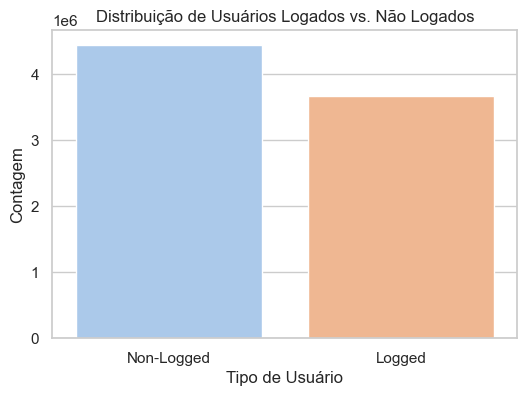

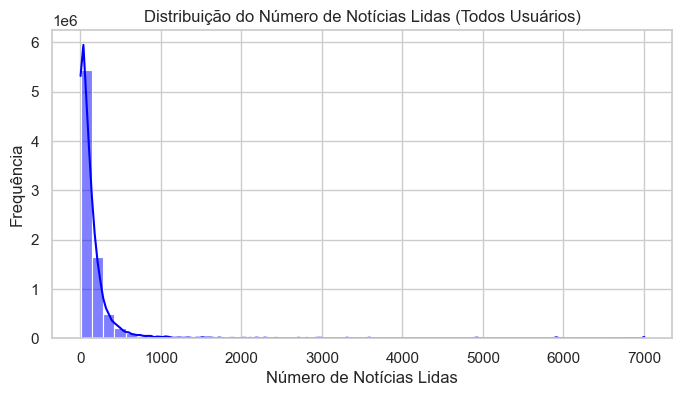

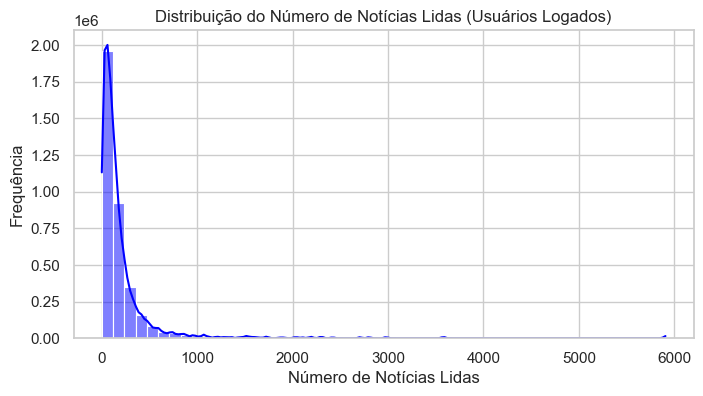

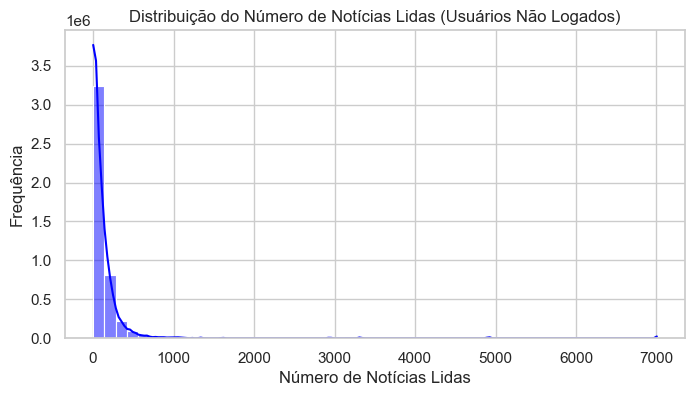

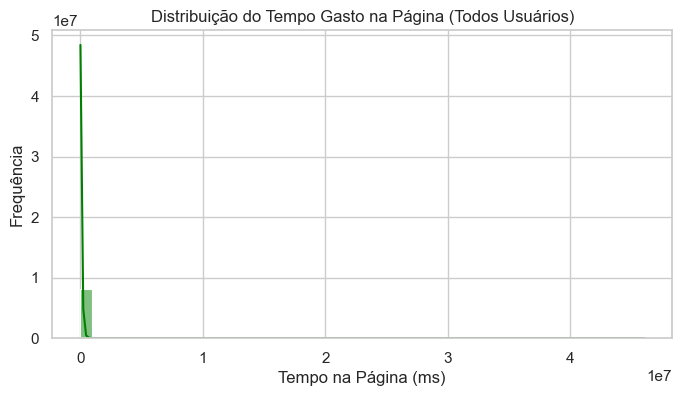

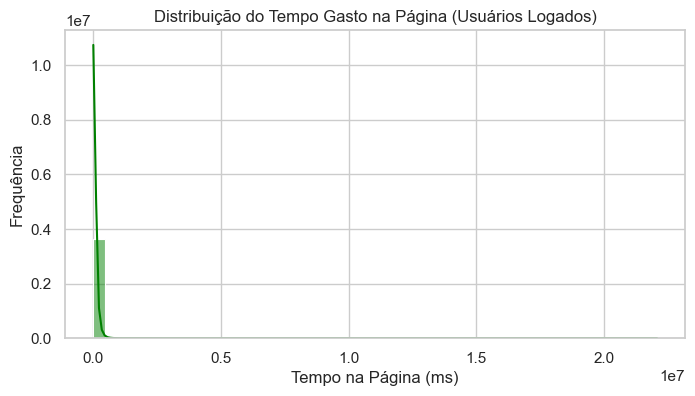

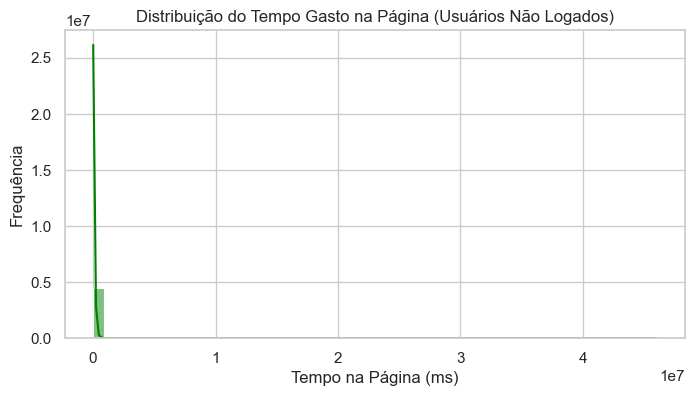

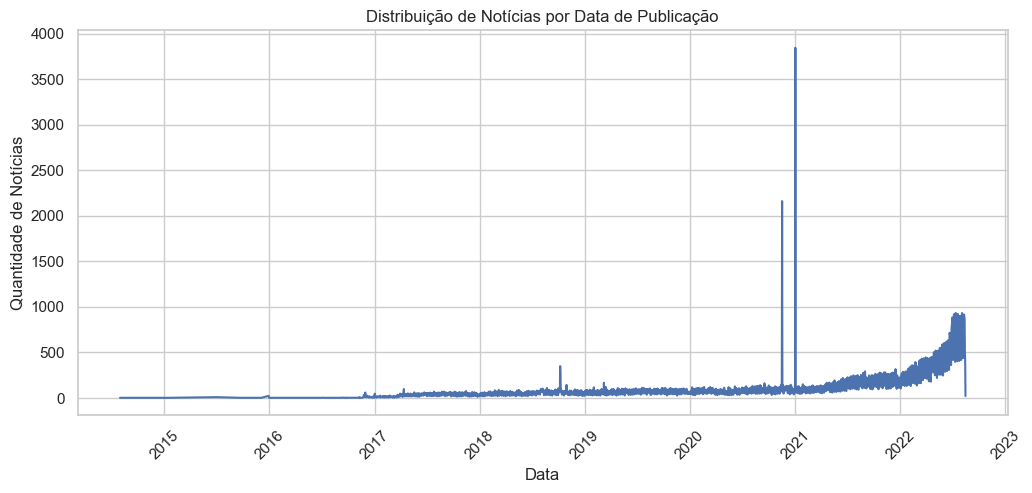


=== T√≠tulos Mais Frequentes ===
title
Elei√ß√µes 2018 no G1 - Pesquisas, Apura√ß√£o de Votos e Resultados                        50
Empresas abrem vagas de emprego, est√°gio e trainee; veja lista                         18
Balc√£o do BDMG: veja vagas de emprego e est√°gio em BH e regi√£o                         13
Empresas abrem vagas de emprego e est√°gio; veja lista                                  12
Produtos das Ceasas do Paran√° t√™m altera√ß√£o nos pre√ßos; confira                        11
Mega-Sena pode pagar R$ 3 milh√µes neste s√°bado                                          8
Confira p√∫blico e locais para se vacinar contra a Covid-19 em Campo Grande              6
Agenda cultural: confira o que fazer na Grande Bel√©m neste fim de semana                6
Mega-Sena pode pagar R$ 3 milh√µes nesta quarta-feira                                    6
Litoral da Para√≠ba tem sete trechos de praias impr√≥prios para banho; confira locais     6

=== Legendas Mais Frequentes ===
capti

'An√°lise Explorat√≥ria Finalizada!'

In [37]:
eda_users_items_plot(df_user_stage, df_item)

#### EDA Sum√°rio

In [38]:
summary = eda_summary(df_user_stage, df_item)
save_summary_to_txt(summary, filename="eda_summary_stage.txt")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123951 entries, 0 to 8123950
Data columns (total 10 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   userId                   object 
 1   userType                 object 
 2   historySize              int64  
 3   history                  object 
 4   timestampHistory         int64  
 5   numberOfClicksHistory    int64  
 6   timeOnPageHistory        int64  
 7   scrollPercentageHistory  float64
 8   pageVisitsCountHistory   int64  
 9   timestampHistory_new     int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 619.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255603 entries, 0 to 255602
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype              
---  ------    --------------   -----              
 0   page      255603 non-null  object             
 1   url       255603 non-null  object             
 2   issued    255603 non-null  datetime64[ns, UT

### Outliers

Os outliers podem afetar a recomenda√ß√£o, ent√£o precisamos trat√°-los para evitar distor√ß√µes.

#### Poss√≠veis outliers identificados:
- historySize: M√©dia de 164 not√≠cias lidas, mas com um m√°ximo de 7.004. Podemos limitar isso, pois pode haver usu√°rios consumindo conte√∫do de forma at√≠pica (bots, por exemplo).
- numberOfClicksHistory: M√©dia de 12 cliques, mas o m√°ximo √© 14.562. Um usu√°rio real dificilmente clica tantas vezes numa mesma not√≠cia.
- timeOnPageHistory: A m√©dia √© 88 segundos, mas h√° registros de at√© 12 horas. Podemos estabelecer um tempo m√°ximo razo√°vel (exemplo: 30 minutos?).
- scrollPercentageHistory: A m√©dia √© 54%, mas o m√°ximo chega a 526.275% (erro nos dados?).
- pageVisitsCountHistory: A m√©dia √© 1.13, mas h√° p√°ginas acessadas 654 vezes pelo mesmo usu√°rio.

#### M√©todos de Remo√ß√£o de Outliers: 
| M√©todo                                    | Melhor para                              | Desvantagens                              |
|-------------------------------------------|------------------------------------------|-------------------------------------------|
| Percentil (99%)                           | Distribui√ß√µes gerais sem normalidade     | Pode remover valores leg√≠timos            |
| Desvio-Padr√£o                             | Dados normais                            | Ineficiente para dados assim√©tricos       |
| IQR (1.5x)                                | Dados assim√©tricos                       | N√£o lida bem com outliers muito extremos  |
| Transforma√ß√µes (Log, Box-Cox, Winsorization) | Quando n√£o queremos remover dados        | Pode distorcer a distribui√ß√£o             |
| Machine Learning (Isolation Forest, DBSCAN) | Dados complexos e multimodais            | Exige mais computa√ß√£o                     |


#### A√ß√µes para tratamento:
    - Remover valores acima do percentil 99 para historySize, numberOfClicksHistory, timeOnPageHistory e pageVisitsCountHistory.
    - Corrigir scrollPercentageHistory, que provavelmente tem erros de escala.


Estou removendo os 1% dos valores mais extremos com o percentil 99, mantendo 99% dos dados e equilibrando ru√≠dos com casos reais.
Optei pelo uso do percentil 99 para remover outliers por ser uma abordagem n√£o param√©trica que elimina apenas o 1% de valores mais extremos, preservando 99% dos dados e mantendo um equil√≠brio entre retirar ru√≠dos e reter comportamentos leg√≠timos de usu√°rios que podem ter alto volume de intera√ß√µes.

Verifiquei que em projetos de recomenda√ß√£o, quase sempre h√° uns poucos usu√°rios (ou bots) com comportamentos extremados (acessos e cliques muito acima da m√©dia). Filtrar o percentil 99 √©, na pr√°tica, suficiente para limpar esses registros at√≠picos.

In [39]:
def converter_colunas(df):
    # Liste aqui as colunas que precisam ser num√©ricas
    colunas_numericas = [
        "historySize",
        "numberOfClicksHistory",
        "timeOnPageHistory",
        "scrollPercentageHistory",
        "pageVisitsCountHistory",
    ]

    for col in colunas_numericas:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    return df


def tratar_outliers(df):
    """
    Fun√ß√£o para tratar outliers no dataset de intera√ß√µes do G1.
    Remove valores extremos e corrige inconsist√™ncias, mostrando logs detalhados.
    """
    df = df.copy()
    registros_iniciais = len(df)
    print(f"Registros iniciais: {registros_iniciais}")

    # 1. Limitar historySize ao percentil 99
    limite_history = np.percentile(df["historySize"], 99)
    registros_removidos = len(df[df["historySize"] > limite_history])
    df = df[df["historySize"] <= limite_history]
    print(
        f"historySize: {registros_removidos} registros removidos (limite: {limite_history})"
    )

    # 2. Limitar numberOfClicksHistory ao percentil 99
    limite_clicks = np.percentile(df["numberOfClicksHistory"], 99)
    registros_removidos = len(df[df["numberOfClicksHistory"] > limite_clicks])
    df = df[df["numberOfClicksHistory"] <= limite_clicks]
    print(
        f"numberOfClicksHistory: {registros_removidos} registros removidos (limite: {limite_clicks})"
    )

    # 3. Limitar timeOnPageHistory a no m√°ximo 30 minutos (1.800.000 ms)
    limite_tempo = 1_800_000  # 30 minutos em milissegundos
    registros_removidos = len(df[df["timeOnPageHistory"] > limite_tempo])
    df = df[df["timeOnPageHistory"] <= limite_tempo]
    print(
        f"timeOnPageHistory: {registros_removidos} registros removidos (limite: {limite_tempo} ms)"
    )

    # 4. Corrigir scrollPercentageHistory (n√£o pode ser maior que 100%)
    registros_removidos = len(df[df["scrollPercentageHistory"] > 100])
    df = df[df["scrollPercentageHistory"] <= 100]
    print(
        f"scrollPercentageHistory: {registros_removidos} registros removidos (limite: 100%)"
    )

    # 5. Limitar pageVisitsCountHistory ao percentil 99
    limite_visitas = np.percentile(df["pageVisitsCountHistory"], 99)
    registros_removidos = len(df[df["pageVisitsCountHistory"] > limite_visitas])
    df = df[df["pageVisitsCountHistory"] <= limite_visitas]
    print(
        f"pageVisitsCountHistory: {registros_removidos} registros removidos (limite: {limite_visitas})"
    )

    registros_finais = len(df)
    print(f"Registros finais: {registros_finais}")
    print(f"Total de registros removidos: {registros_iniciais - registros_finais}")

    return df

In [44]:
df_user_stage.dtypes

userId                      object
userType                    object
historySize                  int64
history                     object
timestampHistory             int64
numberOfClicksHistory        int64
timeOnPageHistory            int64
scrollPercentageHistory    float64
pageVisitsCountHistory       int64
timestampHistory_new         int64
dtype: object

In [46]:
df_user_stage_convert = converter_colunas(df_user_stage)
df_user_stage_convert.dtypes

userId                      object
userType                    object
historySize                  int64
history                     object
timestampHistory             int64
numberOfClicksHistory        int64
timeOnPageHistory            int64
scrollPercentageHistory    float64
pageVisitsCountHistory       int64
timestampHistory_new         int64
dtype: object

In [47]:
df_user_clean = tratar_outliers(df_user_stage_convert)

Registros iniciais: 8123951
historySize: 79818 registros removidos (limite: 1444.0)
numberOfClicksHistory: 79903 registros removidos (limite: 113.0)
timeOnPageHistory: 529 registros removidos (limite: 1800000 ms)
scrollPercentageHistory: 1984 registros removidos (limite: 100%)
pageVisitsCountHistory: 50333 registros removidos (limite: 3.0)
Registros finais: 7911384
Total de registros removidos: 212567


In [ ]:
eda_summary_clean_outliers = eda_summary(df_user_clean, df_item)
save_summary_to_txt(
    eda_summary_clean_outliers, filename="eda_summary_clean_outliers.txt"
)

<class 'pandas.core.frame.DataFrame'>
Index: 7911384 entries, 0 to 8123950
Data columns (total 10 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   userId                   object 
 1   userType                 object 
 2   historySize              int64  
 3   history                  object 
 4   timestampHistory         int64  
 5   numberOfClicksHistory    int64  
 6   timeOnPageHistory        int64  
 7   scrollPercentageHistory  float64
 8   pageVisitsCountHistory   int64  
 9   timestampHistory_new     int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 663.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255603 entries, 0 to 255602
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype              
---  ------    --------------   -----              
 0   page      255603 non-null  object             
 1   url       255603 non-null  object             
 2   issued    255603 non-null  datetime64[ns, UTC]
 3

Aplicado Corretamente o tratamento de Outliers

In [ ]:
# Salvar o DataFrame em um arquivo CSV
df_user_clean.to_csv("script_shared/data/refined/refined_user_training.csv", index=False)

In [ ]:
df_user_clean = pd.read_csv(
    "script_shared/data/refined/refined_user_training.csv", delimiter=","
)

### Transforming Validacao e Item

In [ ]:
df_item_1 = pd.read_csv(
    "script_shared/data/raw/itens/itens/itens-parte1.csv", delimiter=","
)
df_item_2 = pd.read_csv(
    "script_shared/data/raw/itens/itens/itens-parte2.csv", delimiter=","
)
df_item_3 = pd.read_csv(
    "script_shared/data/raw/itens/itens/itens-parte3.csv", delimiter=","
)

df_item = pd.concat([df_item_1, df_item_2, df_item_3], ignore_index=True)

# Salvar o DataFrame em um arquivo CSV
df_item.to_csv("script_shared/data/refined/refined_item.csv", index=False)

In [ ]:
df_validacao_raw = pd.read_csv(
    "script_shared/data/avaliacao/validacao.csv", delimiter=","
)

# Garantir que as colunas de listas tenham os valores corretamente tratados
list_columns = ["history", "timestampHistory"]

for col in list_columns:
    # Remover \n, colchetes, aspas e espa√ßos extras antes de dividir
    df_validacao_raw[col] = (
        df_validacao_raw[col]
        .astype(str)
        .str.replace(r"[\n\[\]\'\"]", "", regex=True)
        .str.strip()
    )
    df_validacao_raw[col] = df_validacao_raw[
        col
    ].str.split()  # Divide corretamente os valores

# Explodir as colunas para criar uma linha por intera√ß√£o do usu√°rio
df_validacao_raw = df_validacao_raw.explode(list_columns)

# Converter `timestampHistory` para num√©rico e depois para datetime
df_validacao_raw["timestampHistory"] = pd.to_numeric(
    df_validacao_raw["timestampHistory"], errors="coerce"
)
df_validacao_raw["timestampHistory"] = pd.to_datetime(
    df_validacao_raw["timestampHistory"], unit="ms"
)

# Renomear `history` para `page` para manter consist√™ncia com os dados de treino
df_validacao_raw = df_validacao_raw.rename(columns={"history": "page"})

# **Corrigir IDs removendo aspas extras**
df_validacao_raw["page"] = df_validacao_raw["page"].astype(str).str.strip()

# Resetar √≠ndice para organizar os dados
df_validacao_raw = df_validacao_raw.reset_index(drop=True)

# Salvar o DataFrame em um arquivo CSV
df_validacao_raw.to_csv("data/refined/refined_validacao.csv", index=False)

### Modelo

#### Pegando os Dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_user_clean = pd.read_csv(
    "script_shared/data/refined/refined_user_training.csv", delimiter=","
)
df_item = pd.read_csv("script_shared/data/refined/refined_item.csv", delimiter=",")
df_validacao_raw = pd.read_csv(
    "script_shared/data/refined/refined_validacao.csv", delimiter=","
)

df_user_clean = df_user_clean.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_item = df_item.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_validacao_raw = df_validacao_raw.applymap(
    lambda x: x.strip() if isinstance(x, str) else x
)

In [2]:
# Reduzindo a quantidade de amostras de valida√ß√£o
import numpy as np

# Definir a quantidade total desejada na amostra
num_amostras = 30000

# Definir um limite m√°ximo de intera√ß√µes por usu√°rio (para evitar vi√©s de heavy users)
max_interacoes_por_user = 20

# Garantir que cada usu√°rio tenha pelo menos algumas intera√ß√µes
usuarios_unicos = df_validacao_raw["userId"].unique()
df_validacao = df_validacao_raw.groupby("userId").apply(
    lambda x: x.sample(n=min(len(x), max_interacoes_por_user), random_state=42)
)
df_validacao = df_validacao.reset_index(drop=True)

# Se ainda tiver muitas linhas, fazer um sample final
if len(df_validacao) > num_amostras:
    df_validacao = df_validacao.sample(n=num_amostras, random_state=42).reset_index(
        drop=True
    )

print(
    f"Reduzimos df_validacao_raw de {len(df_validacao_raw)} para {len(df_validacao)} linhas."
)
print(f"Usu√°rios √∫nicos na amostra: {df_validacao['userId'].nunique()}")

Reduzimos df_validacao_raw de 178868 para 30000 linhas.
Usu√°rios √∫nicos na amostra: 27020


C:\Users\pablo\AppData\Local\Temp\ipykernel_20556\1132467293.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_validacao = df_validacao_raw.groupby('userId').apply(lambda x: x.sample(n=min(len(x), max_interacoes_por_user), random_state=42))


##### Verificando Usu√°rios An√¥nimos

In [3]:
# df_user_clean = ... (j√° sem outliers)
df_nao_logados = df_user_clean[df_user_clean["userType"] == "Non-Logged"]

# Contar quantas intera√ß√µes por userId an√¥nimo
user_counts = df_nao_logados["userId"].value_counts()

# Ver quantos userId t√™m mais de 1 intera√ß√£o
multi_interacao = (user_counts > 1).sum()
print(f"{multi_interacao} usu√°rios an√¥nimos t√™m mais de 1 intera√ß√£o.")

224404 usu√°rios an√¥nimos t√™m mais de 1 intera√ß√£o.


In [5]:
df_validacao_raw

userId    userType  \
0       e25fbee3a42d45a2914f9b061df3386b2ded2d8cc1f3d4...      Logged   
1       e25fbee3a42d45a2914f9b061df3386b2ded2d8cc1f3d4...      Logged   
2       d0afad7ea843d86597d822f0df1d39d31a3fea7c39fdee...      Logged   
3       755062dd39a48809880cf363b04268c3af2c003088cde0...      Logged   
4       ec1639851d99586c7f4da928deb49187303aec6e3b8d66...      Logged   
...                                                   ...         ...   
178863  aacb28d7d2a4ea745e12ceba1f9ffa0c7b92aae9304ce5...  Non-Logged   
178864  91b3a960562e34504022dbe552c0e8947af20fd14ce861...  Non-Logged   
178865  9de95a8cd681cd21cc9a7e830859e468b83c051c11f0c4...  Non-Logged   
178866  001455437b3ca991b144afd8cb785f7727eb0c154faa54...  Non-Logged   
178867  c53ce611cd840e9764ddfe55e5ae88620bba9655cc9712...  Non-Logged   

                                        page         timestampHistory  
0       be89a7da-d9fa-49d4-9fdc-388c27a15bc8  2022-08-15 03:12:16.590  
1       01c59ff6-fb82-4258-918f-2910cb2d4c52  2022-08-16 17:48:33.513  
2       77901133-aee7-4f7b-afc0-652231d76fe9  2022-08-15 09:47:40.253  
3       857aa90f-a7ec-410d-ba82-dfa4f85d4e71  2022-08-15 11:07:29.242  
4       b7b90e18-7613-4ca0-a8fc-fd69addfcd85  2022-08-15 03:23:50.245  
...                                      ...                      ...  
178863  ecb1f348-cd55-47f7-99f9-bb2c84e93f96  2022-08-15 06:56:52.592  
178864  ecb1f348-cd55-47f7-99f9-bb2c84e93f96  2022-08-15 20:57:06.440  
178865  3d52cd6b-706e-49f0-9215-0340010a9845  2022-08-16 19:41:02.844  
178866  d730c4a6-e8f6-4fde-b73a-afbe148479cd  2022-08-15 17:23:48.926  
178867  f2cece80-1542-4fae-b4f5-12b539b19ba1  2022-08-15 17:36:24.182  

[178868 rows x 4 columns]

#### Modelo Usu√°rio Logado

##### Recomenda√ß√£o com Modelos de Filtragem Colaborativa Variados

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import ndcg_score
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares
from implicit.bpr import BayesianPersonalizedRanking
from implicit.nearest_neighbours import ItemItemRecommender  # KNN-like

import random
import scipy.sparse as sp

# Definir SEED GLOBAL
SEED = 42
np.random.seed(SEED)
random.seed(SEED)


######################
# Fun√ß√µes auxiliares #
######################


def peso_de_recencia_item(item_modified, ref_time=None, half_life_days=7):
    """
    Aplica decaimento exponencial baseado em 'Modified' (ou 'Issued').
    """
    date_dt = pd.to_datetime(item_modified)
    if ref_time is None:
        ref_time = pd.to_datetime(df_item["Modified"].max())
    diff_days = (ref_time - date_dt).days
    weight = 0.5 ** (diff_days / half_life_days)
    return weight


def encode_ids(df_interactions):
    """Mapeia userId/page -> √≠ndices num√©ricos."""
    unique_users = df_interactions["userId"].unique()
    unique_items = df_interactions["page"].unique()

    user_to_idx = {u: i for i, u in enumerate(unique_users)}
    item_to_idx = {p: i for i, p in enumerate(unique_items)}

    df_interactions["user_idx"] = df_interactions["userId"].map(user_to_idx)
    df_interactions["item_idx"] = df_interactions["page"].map(item_to_idx)
    return df_interactions, user_to_idx, item_to_idx


def create_sparse_matrix(
    df_interactions, user_col="user_idx", item_col="item_idx", value_col="final_score"
):
    """Cria matriz esparsa CSR."""
    rows = df_interactions[user_col].values
    cols = df_interactions[item_col].values
    vals = df_interactions[value_col].values

    n_users = df_interactions[user_col].max() + 1
    n_items = df_interactions[item_col].max() + 1

    sparse_mat = csr_matrix((vals, (rows, cols)), shape=(n_users, n_items))
    return sparse_mat


def criar_score_engajamento_param(
    row, w_time=0.5, w_clicks=1.0, w_scroll=0.2, w_visits=0.5
):
    time_minutes = row["timeOnPageHistory"] / 60000.0
    # log1p para estabilizar valores muito grandes
    time_minutes_log = np.log1p(time_minutes)
    return (
        w_time * time_minutes_log
        + w_clicks * row["numberOfClicksHistory"]
        + w_scroll * row["scrollPercentageHistory"]
        + w_visits * row["pageVisitsCountHistory"]
    )


def build_user_item_matrix(
    df_logados,
    df_item,
    w_time=0.5,
    w_clicks=1.0,
    w_scroll=0.2,
    w_visits=0.5,
    apply_recency_user=True,
    apply_recency_item=False,
    half_life_days_user=7,
    half_life_days_item=3,
):
    # Merge
    df_logados["history"] = df_logados["history"].astype(str).str.strip()
    df_item["page"] = df_item["page"].astype(str).str.strip()
    df_merged = pd.merge(
        df_logados, df_item, how="left", left_on="history", right_on="page"
    )

    # Engajamento
    df_merged["engagement"] = df_merged.apply(
        lambda row: criar_score_engajamento_param(
            row, w_time, w_clicks, w_scroll, w_visits
        ),
        axis=1,
    )

    # Rec√™ncia do Usu√°rio
    if apply_recency_user:
        ref_time_user = pd.to_datetime(df_logados["timestampHistory"].max(), unit="ms")
        df_merged["user_weight"] = df_merged["timestampHistory"].apply(
            lambda ts: peso_de_recencia_user(ts, ref_time_user, half_life_days_user)
        )
    else:
        df_merged["user_weight"] = 1.0

    # Rec√™ncia do Item
    if apply_recency_item:
        ref_time_item = pd.to_datetime(df_item["Modified"].max())
        df_merged["item_weight"] = df_merged["Modified"].apply(
            lambda dt: peso_de_recencia_item(dt, ref_time_item, half_life_days_item)
        )
    else:
        df_merged["item_weight"] = 1.0

    # final_score = engajamento * user_weight * item_weight
    df_merged["final_score"] = (
        df_merged["engagement"] * df_merged["user_weight"] * df_merged["item_weight"]
    )

    df_interactions = df_merged.groupby(["userId", "page"], as_index=False)[
        "final_score"
    ].sum()
    return df_interactions


def instanciar_modelo(
    tipo="ALS", factors=50, regularization=0.1, iterations=15, alpha=15, k_nn=10
):
    """
    Retorna um modelo da lib 'implicit':
      - 'ALS': AlternatingLeastSquares
      - 'BPR': BayesianPersonalizedRanking
      - 'KNN': ItemItemRecommender (similar a item-based KNN)

    Outras libs ou outras classes tamb√©m podem ser adicionadas.
    """
    if tipo.upper() == "ALS":
        model = AlternatingLeastSquares(
            factors=factors,
            regularization=regularization,
            iterations=iterations,
            use_gpu=False,
            random_state=SEED,  # SEED fixo para reprodutibilidade
        )
        return model

    elif tipo.upper() == "BPR":
        model = BayesianPersonalizedRanking(
            factors=factors,
            regularization=regularization,
            iterations=iterations,
            learning_rate=0.01,
            random_state=SEED,  # SEED fixo no BPR
        )
        return model

    elif tipo.upper() == "KNN":
        model = ItemItemRecommender(K=k_nn)
        return model  # KNN da lib implicit n√£o aceita seed diretamente

    else:
        raise ValueError("Modelo n√£o reconhecido: %s" % tipo)


def treinar_modelo_implicit(model, sparse_interactions, alpha=15.0, tipo="ALS"):
    """
    Treina o modelo. Para ALS/BPR passamos (alpha * sparse_interactions) caso use alpha.
    Para KNN, s√≥ passamos a matriz normal.
    """
    if tipo.upper() == "ALS":
        confidence = sparse_interactions * alpha
        model.fit(confidence)
    elif tipo.upper() == "BPR":
        model.fit(sparse_interactions)
    elif tipo.upper() == "KNN":
        model.fit(sparse_interactions)
    else:
        raise ValueError("Modelo n√£o reconhecido: %s" % tipo)

    return model


def recomendar_para_usuario(
    model, user_id, user_to_idx, item_to_idx, sparse_interactions, top_k=10
):
    if user_id not in user_to_idx:
        return []
    user_idx = user_to_idx[user_id]

    user_vector = sparse_interactions[user_idx]
    item_idxs, scores = model.recommend(user_idx, user_vector, N=top_k)

    idx_to_item = {v: k for k, v in item_to_idx.items()}
    recomendacoes = [
        (idx_to_item[item_idx], score) for item_idx, score in zip(item_idxs, scores)
    ]
    return recomendacoes


def avaliar_modelo(
    df_validacao, model, user_to_idx, item_to_idx, sparse_interactions, k=10
):
    recalls = []
    ndcgs = []

    user_relevantes = {
        user: set(df_validacao[df_validacao["userId"] == user]["page"])
        for user in df_validacao["userId"].unique()
    }

    for user_id, verdadeiros in user_relevantes.items():
        if user_id not in user_to_idx:
            continue

        recs = recomendar_para_usuario(
            model, user_id, user_to_idx, item_to_idx, sparse_interactions, top_k=k
        )
        if not recs:
            continue

        recomendados = [page for page, _ in recs]

        # Recall@K
        intersecao = len(set(recomendados) & verdadeiros)
        recall = intersecao / len(verdadeiros) if len(verdadeiros) > 0 else 0
        recalls.append(recall)

        # Ver quantos itens foram de fato recomendados
        if len(recs) < 2:
            # Se s√≥ 1 item foi recomendado, n√£o faz sentido NDCG > 1
            ndcgs.append(0.0)
            continue

        # C√°lculo normal de NDCG
        y_true = np.array([1 if page in verdadeiros else 0 for page in recomendados])
        y_pred = np.array([score for _, score in recs])

        ndcg_user = ndcg_score([y_true], [y_pred])
        ndcgs.append(ndcg_user)

    mean_recall = np.mean(recalls) if len(recalls) > 0 else 0
    mean_ndcg = np.mean(ndcgs) if len(ndcgs) > 0 else 0
    return mean_recall, mean_ndcg

c:\Users\pablo\Desktop\Hackaton\sistema_recomendacao_noticias\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import os
import pandas as pd
import numpy as np
from datetime import datetime


# Filtrar somente usu√°rios logados no df_user_clean
df_logados = df_user_clean[df_user_clean["userType"] == "Logged"]

lista_de_pesos = [
    {"w_time": 0.3, "w_clicks": 1.0, "w_scroll": 0.5, "w_visits": 1.0},
    {"w_time": 0.5, "w_clicks": 2.0, "w_scroll": 0.2, "w_visits": 0.5},
    {"w_time": 0.2, "w_clicks": 1.0, "w_scroll": 0.3, "w_visits": 2.0},
]

tipos_de_modelo = ["ALS", "BPR", "KNN"] 

hiperparametros = [
    {"factors": 50, "regularization": 0.1, "iterations": 10, "alpha": 15},
    {"factors": 100, "regularization": 0.05, "iterations": 15, "alpha": 20},
    {"factors": 150, "regularization": 0.01, "iterations": 20, "alpha": 25},
]


# Criar diret√≥rio para armazenar resultados se n√£o existir
if not os.path.exists("resultado_metricas"):
    os.makedirs("resultado_metricas")

# Caminho fixo do arquivo de m√©tricas
file_path = "resultado_metricas/metricas_resultados.csv"

# Criar DataFrame para armazenar os resultados
df_resultados = pd.DataFrame(
    columns=[
        "timestamp",
        "w_time",
        "w_clicks",
        "w_scroll",
        "w_visits",
        "modelo",
        "factors",
        "regularization",
        "iterations",
        "alpha",
        "recall_k",
        "ndcg_k",
    ]
)

###############################
# Loop de Treinamento e Avalia√ß√£o
###############################
melhor_ndcg_global = 0
melhor_config = None
best_model = None

for pesos in lista_de_pesos:
    print(f"\n== Testando pesos: {pesos} ==\n")

    # Construir matriz user-item com os pesos
    df_interactions = build_user_item_matrix(
        df_logados,
        df_item,
        w_time=pesos["w_time"],
        w_clicks=pesos["w_clicks"],
        w_scroll=pesos["w_scroll"],
        w_visits=pesos["w_visits"],
        apply_recency=True,
    )
    df_interactions, user_to_idx, item_to_idx = encode_ids(df_interactions)
    sparse_mat = create_sparse_matrix(df_interactions)

    for tipo_modelo in tipos_de_modelo:
        print(f"--- Modelo: {tipo_modelo} ---")

        for params in hiperparametros:
            print("Hiperpar√¢metros:", params)

            # Instanciar modelo
            model = instanciar_modelo(
                tipo=tipo_modelo,
                factors=params["factors"],
                regularization=params["regularization"],
                iterations=params["iterations"],
                alpha=params.get("alpha", 15),
                k_nn=10,  # Se for KNN
            )

            # Treinar modelo
            model = treinar_modelo_implicit(
                model, sparse_mat, alpha=params.get("alpha", 15), tipo=tipo_modelo
            )

            # Avalia√ß√£o
            recall, ndcg = avaliar_modelo(
                df_validacao, model, user_to_idx, item_to_idx, sparse_mat
            )
            print(f" --> Recall@K: {recall:.4f} | NDCG@K: {ndcg:.4f}")

            # Adicionar resultado ao DataFrame
            resultado = {
                "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                "w_time": pesos["w_time"],
                "w_clicks": pesos["w_clicks"],
                "w_scroll": pesos["w_scroll"],
                "w_visits": pesos["w_visits"],
                "modelo": tipo_modelo,
                "factors": params["factors"],
                "regularization": params["regularization"],
                "iterations": params["iterations"],
                "alpha": params.get("alpha", 15),
                "recall_k": recall,
                "ndcg_k": ndcg,
            }

            df_resultados = pd.concat(
                [df_resultados, pd.DataFrame([resultado])], ignore_index=True
            )

            if os.path.exists(file_path):
                df_resultados.to_csv(file_path, mode="a", index=False, header=False)
            else:
                df_resultados.to_csv(file_path, mode="w", index=False)

            # Verificar se √© o melhor global
            if ndcg > melhor_ndcg_global:
                melhor_ndcg_global = ndcg
                melhor_config = {
                    "pesos": pesos,
                    "modelo": tipo_modelo,
                    "params": params,
                }
                best_model = model

print("\n=== MELHOR CONFIGURA√á√ÉO GERAL ===")
print("NDCG:", melhor_ndcg_global)
print("Config:", melhor_config)

print(
    "üìÅ Resultados adicionados ao arquivo 'resultado_metricas/metricas_resultados.csv'."
)


== Testando pesos: {'w_time': 0.3, 'w_clicks': 1.0, 'w_scroll': 0.5, 'w_visits': 1.0} ==



C:\Users\pablo\AppData\Local\Temp\ipykernel_304\388866501.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logados['history'] = df_logados['history'].astype(str).str.strip()
c:\Users\pablo\Desktop\Hackaton\sistema_recomendacao_noticias\venv\lib\site-packages\implicit\cpu\als.py:95: RuntimeWarning: OpenBLAS is configured to use 12 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


--- Modelo: ALS ---
Hiperpar√¢metros: {'factors': 50, 'regularization': 0.1, 'iterations': 10, 'alpha': 15}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:04<00:00,  2.22it/s]
C:\Users\pablo\AppData\Local\Temp\ipykernel_304\1405255582.py:86: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_resultados = pd.concat([df_resultados, pd.DataFrame([resultado])], ignore_index=True)


 --> Recall@K: 0.0028 | NDCG@K: 0.0019
Hiperpar√¢metros: {'factors': 100, 'regularization': 0.05, 'iterations': 15, 'alpha': 20}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15/15 [00:08<00:00,  1.78it/s]


 --> Recall@K: 0.0035 | NDCG@K: 0.0019
Hiperpar√¢metros: {'factors': 150, 'regularization': 0.01, 'iterations': 20, 'alpha': 25}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:31<00:00,  1.57s/it]


 --> Recall@K: 0.0044 | NDCG@K: 0.0026
--- Modelo: BPR ---
Hiperpar√¢metros: {'factors': 50, 'regularization': 0.1, 'iterations': 10, 'alpha': 15}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:02<00:00,  3.76it/s, train_auc=51.28%, skipped=6.46%]


 --> Recall@K: 0.0012 | NDCG@K: 0.0005
Hiperpar√¢metros: {'factors': 100, 'regularization': 0.05, 'iterations': 15, 'alpha': 20}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15/15 [00:06<00:00,  2.50it/s, train_auc=52.37%, skipped=6.48%]


 --> Recall@K: 0.0015 | NDCG@K: 0.0007
Hiperpar√¢metros: {'factors': 150, 'regularization': 0.01, 'iterations': 20, 'alpha': 25}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:10<00:00,  1.91it/s, train_auc=74.32%, skipped=6.49%]


 --> Recall@K: 0.0036 | NDCG@K: 0.0022
--- Modelo: KNN ---
Hiperpar√¢metros: {'factors': 50, 'regularization': 0.1, 'iterations': 10, 'alpha': 15}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 147359/147359 [00:01<00:00, 124674.75it/s]


 --> Recall@K: 0.0126 | NDCG@K: 0.0043
Hiperpar√¢metros: {'factors': 100, 'regularization': 0.05, 'iterations': 15, 'alpha': 20}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 147359/147359 [00:01<00:00, 123011.06it/s]


 --> Recall@K: 0.0126 | NDCG@K: 0.0043
Hiperpar√¢metros: {'factors': 150, 'regularization': 0.01, 'iterations': 20, 'alpha': 25}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 147359/147359 [00:01<00:00, 125738.72it/s]


 --> Recall@K: 0.0126 | NDCG@K: 0.0043

== Testando pesos: {'w_time': 0.5, 'w_clicks': 2.0, 'w_scroll': 0.2, 'w_visits': 0.5} ==



C:\Users\pablo\AppData\Local\Temp\ipykernel_304\388866501.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logados['history'] = df_logados['history'].astype(str).str.strip()


--- Modelo: ALS ---
Hiperpar√¢metros: {'factors': 50, 'regularization': 0.1, 'iterations': 10, 'alpha': 15}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:04<00:00,  2.20it/s]


 --> Recall@K: 0.0034 | NDCG@K: 0.0020
Hiperpar√¢metros: {'factors': 100, 'regularization': 0.05, 'iterations': 15, 'alpha': 20}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15/15 [00:08<00:00,  1.79it/s]


 --> Recall@K: 0.0032 | NDCG@K: 0.0019
Hiperpar√¢metros: {'factors': 150, 'regularization': 0.01, 'iterations': 20, 'alpha': 25}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:18<00:00,  1.08it/s]


 --> Recall@K: 0.0039 | NDCG@K: 0.0024
--- Modelo: BPR ---
Hiperpar√¢metros: {'factors': 50, 'regularization': 0.1, 'iterations': 10, 'alpha': 15}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:02<00:00,  3.64it/s, train_auc=51.25%, skipped=6.46%]


 --> Recall@K: 0.0014 | NDCG@K: 0.0007
Hiperpar√¢metros: {'factors': 100, 'regularization': 0.05, 'iterations': 15, 'alpha': 20}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15/15 [00:06<00:00,  2.37it/s, train_auc=52.39%, skipped=6.48%]


 --> Recall@K: 0.0014 | NDCG@K: 0.0010
Hiperpar√¢metros: {'factors': 150, 'regularization': 0.01, 'iterations': 20, 'alpha': 25}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:10<00:00,  1.92it/s, train_auc=74.35%, skipped=6.49%]


 --> Recall@K: 0.0043 | NDCG@K: 0.0025
--- Modelo: KNN ---
Hiperpar√¢metros: {'factors': 50, 'regularization': 0.1, 'iterations': 10, 'alpha': 15}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 147359/147359 [00:01<00:00, 126231.12it/s]


 --> Recall@K: 0.0120 | NDCG@K: 0.0041
Hiperpar√¢metros: {'factors': 100, 'regularization': 0.05, 'iterations': 15, 'alpha': 20}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 147359/147359 [00:01<00:00, 125725.60it/s]


 --> Recall@K: 0.0120 | NDCG@K: 0.0041
Hiperpar√¢metros: {'factors': 150, 'regularization': 0.01, 'iterations': 20, 'alpha': 25}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 147359/147359 [00:01<00:00, 125280.57it/s]


 --> Recall@K: 0.0120 | NDCG@K: 0.0041

== Testando pesos: {'w_time': 0.2, 'w_clicks': 1.0, 'w_scroll': 0.3, 'w_visits': 2.0} ==



C:\Users\pablo\AppData\Local\Temp\ipykernel_304\388866501.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logados['history'] = df_logados['history'].astype(str).str.strip()


--- Modelo: ALS ---
Hiperpar√¢metros: {'factors': 50, 'regularization': 0.1, 'iterations': 10, 'alpha': 15}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:04<00:00,  2.21it/s]


 --> Recall@K: 0.0025 | NDCG@K: 0.0018
Hiperpar√¢metros: {'factors': 100, 'regularization': 0.05, 'iterations': 15, 'alpha': 20}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15/15 [00:08<00:00,  1.80it/s]


 --> Recall@K: 0.0033 | NDCG@K: 0.0018
Hiperpar√¢metros: {'factors': 150, 'regularization': 0.01, 'iterations': 20, 'alpha': 25}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:17<00:00,  1.13it/s]


 --> Recall@K: 0.0040 | NDCG@K: 0.0025
--- Modelo: BPR ---
Hiperpar√¢metros: {'factors': 50, 'regularization': 0.1, 'iterations': 10, 'alpha': 15}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:02<00:00,  3.80it/s, train_auc=51.25%, skipped=6.46%]


 --> Recall@K: 0.0004 | NDCG@K: 0.0003
Hiperpar√¢metros: {'factors': 100, 'regularization': 0.05, 'iterations': 15, 'alpha': 20}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15/15 [00:05<00:00,  2.51it/s, train_auc=52.41%, skipped=6.48%]


 --> Recall@K: 0.0021 | NDCG@K: 0.0012
Hiperpar√¢metros: {'factors': 150, 'regularization': 0.01, 'iterations': 20, 'alpha': 25}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:10<00:00,  1.93it/s, train_auc=74.33%, skipped=6.49%]


 --> Recall@K: 0.0040 | NDCG@K: 0.0023
--- Modelo: KNN ---
Hiperpar√¢metros: {'factors': 50, 'regularization': 0.1, 'iterations': 10, 'alpha': 15}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 147359/147359 [00:01<00:00, 123202.73it/s]


 --> Recall@K: 0.0124 | NDCG@K: 0.0042
Hiperpar√¢metros: {'factors': 100, 'regularization': 0.05, 'iterations': 15, 'alpha': 20}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 147359/147359 [00:01<00:00, 121803.37it/s]


 --> Recall@K: 0.0124 | NDCG@K: 0.0042
Hiperpar√¢metros: {'factors': 150, 'regularization': 0.01, 'iterations': 20, 'alpha': 25}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 147359/147359 [00:01<00:00, 121096.15it/s]


 --> Recall@K: 0.0124 | NDCG@K: 0.0042

=== MELHOR CONFIGURA√á√ÉO GERAL ===
NDCG: 0.004262475420215332
Config: {'pesos': {'w_time': 0.3, 'w_clicks': 1.0, 'w_scroll': 0.5, 'w_visits': 1.0}, 'modelo': 'KNN', 'params': {'factors': 50, 'regularization': 0.1, 'iterations': 10, 'alpha': 15}}
üìÅ Resultados adicionados ao arquivo 'resultado_metricas/metricas_resultados.csv'.


##### Recomenda√ß√£o com Rec√™ncia e Engajamento (Filtragem Colaborativa Pura)

- Engajamento: Calcula um score de engajamento ponderado, atribuindo diferentes pesos para timeOnPage, clicks, scroll e visits, refletindo a import√¢ncia de cada intera√ß√£o.
- Rec√™ncia: Implementa um decaimento exponencial para reduzir a relev√¢ncia de intera√ß√µes antigas e garantir que recomenda√ß√µes sejam mais atualizadas.
    - Rec√™ncia do usu√°rio: Intera√ß√µes mais recentes do usu√°rio s√£o mais relevantes do que as antigas.
    - Rec√™ncia do item: Not√≠cias mais recentes s√£o priorizadas, evitando recomenda√ß√µes de conte√∫dos desatualizados.
- Filtragem Colaborativa: Suporte para m√∫ltiplos modelos de CF:
    - ALS (Alternating Least Squares): Baseado em fatora√ß√£o de matrizes.
    - BPR (Bayesian Personalized Ranking): Modelo de ranking otimizado.
    - KNN (Item-Item Recommender): Baseado na similaridade entre itens.
    - LMF (Logistic Matrix Factorization): Utiliza regress√£o log√≠stica para aprendizado de prefer√™ncias.
    - LightFM: Modelo h√≠brido baseado em aprendizado de m√°quina, combinando CF e informa√ß√µes de conte√∫do.
- Treinamento: Constr√≥i uma matriz esparsa usu√°rio-item ponderada por engajamento e rec√™ncia, utilizando um dos modelos de CF dispon√≠veis.
- Recomenda√ß√£o: Gera uma lista personalizada para cada usu√°rio com base nas intera√ß√µes passadas e no modelo selecionado.
- Avalia√ß√£o: Calcula Recall@K e NDCG@K, analisando a precis√£o das recomenda√ß√µes comparadas aos itens consumidos pelos usu√°rios.
- Grid Search: Testa diversas combina√ß√µes de hiperpar√¢metros, incluindo pesos de engajamento, fatores de regulariza√ß√£o dos modelos de CF e impacto da rec√™ncia, buscando a configura√ß√£o ideal.

In [ ]:
import os
import numpy as np
import random
import pandas as pd
from datetime import datetime

from implicit.als import AlternatingLeastSquares
from implicit.bpr import BayesianPersonalizedRanking
from implicit.nearest_neighbours import ItemItemRecommender
from implicit.lmf import LogisticMatrixFactorization
from lightfm import LightFM

SEED = 42
np.random.seed(SEED)
random.seed(SEED)

#########################
# FILTRAGEM USU√ÅRIOS/ITENS #
#########################


def filtrar_usuarios_itens(df, min_interacoes=3, df_item=None, dias_recent=90):
    user_counts = df["userId"].value_counts()
    users_enough = user_counts[user_counts >= min_interacoes].index
    df_filtrado = df[df["userId"].isin(users_enough)].copy()

    if df_item is not None and "modified" in df_item.columns:
        limite_data = pd.Timestamp.now() - pd.Timedelta(days=dias_recent)
        df_item_filtrado = df_item[df_item["modified"] >= limite_data]
        df_filtrado = df_filtrado[
            df_filtrado["history"].isin(df_item_filtrado["page"].unique())
        ]

    return df_filtrado


#########################
# REC√äNCIA E ENGAJAMENTO #
#########################


def peso_de_recencia_user(timestamp, ref_time, half_life_days=7):
    ts_datetime = pd.to_datetime(timestamp, unit="ms")
    diff_days = (ref_time - ts_datetime).days
    return 0.5 ** (diff_days / half_life_days)


def peso_de_recencia_item(item_modified, ref_time=None, half_life_days=7):
    date_dt = pd.to_datetime(item_modified)
    if ref_time is None:
        ref_time = pd.Timestamp.now()
    diff_days = (ref_time - date_dt).days
    return 0.5 ** (diff_days / half_life_days)


def criar_score_engajamento_param(
    row, w_time=0.5, w_clicks=1.0, w_scroll=0.2, w_visits=0.5
):
    time_minutes = row["timeOnPageHistory"] / 60000.0
    time_minutes_log = np.log1p(time_minutes)
    score = (
        w_time * time_minutes_log
        + w_clicks * row["numberOfClicksHistory"]
        + w_scroll * row["scrollPercentageHistory"]
        + w_visits * row["pageVisitsCountHistory"]
    )
    return score


def build_user_item_matrix(
    df_logados,
    df_item,
    w_time=0.5,
    w_clicks=1.0,
    w_scroll=0.2,
    w_visits=0.5,
    apply_recency_user=True,
    apply_recency_item=False,
    half_life_days_user=7,
    half_life_days_item=3,
):
    df_logados["history"] = df_logados["history"].astype(str).str.strip()
    df_item["page"] = df_item["page"].astype(str).str.strip()

    df_merged = pd.merge(
        df_logados, df_item, how="left", left_on="history", right_on="page"
    )

    df_merged["engagement"] = df_merged.apply(
        lambda row: criar_score_engajamento_param(
            row, w_time, w_clicks, w_scroll, w_visits
        ),
        axis=1,
    )

    if apply_recency_user:
        ref_time_user = pd.to_datetime(df_logados["timestampHistory"].max(), unit="ms")
        df_merged["user_weight"] = df_merged["timestampHistory"].apply(
            lambda ts: peso_de_recencia_user(ts, ref_time_user, half_life_days_user)
        )
    else:
        df_merged["user_weight"] = 1.0

    if apply_recency_item:
        ref_time_item = pd.to_datetime(df_item["modified"].max())
        df_merged["item_weight"] = df_merged["modified"].apply(
            lambda dt: peso_de_recencia_item(dt, ref_time_item, half_life_days_item)
        )
    else:
        df_merged["item_weight"] = 1.0

    df_merged["final_score"] = (
        df_merged["engagement"] * df_merged["user_weight"] * df_merged["item_weight"]
    )
    df_interactions = df_merged.groupby(["userId", "page"], as_index=False)[
        "final_score"
    ].sum()
    return df_interactions


#########################
# MODELOS CF E LIGHTFM  #
#########################


def instanciar_modelo(
    tipo="ALS",
    factors=50,
    regularization=0.1,
    iterations=15,
    alpha=15,
    k_nn=10,
    loss="warp",
):
    """
    Adicionamos LMF e LightFM como op√ß√µes.
    - tipo='LMF': LogisticMatrixFactorization
    - tipo='LIGHTFM': Usa LightFM se instalado
      -> passamos 'loss' (warp, bpr, logistic, etc.)
    """
    if tipo.upper() == "ALS":
        model = AlternatingLeastSquares(
            factors=factors,
            regularization=regularization,
            iterations=iterations,
            use_gpu=False,
            random_state=SEED,
        )
        return model

    elif tipo.upper() == "BPR":
        model = BayesianPersonalizedRanking(
            factors=factors,
            regularization=regularization,
            iterations=iterations,
            learning_rate=0.01,
            random_state=SEED,
        )
        return model

    elif tipo.upper() == "KNN":
        model = ItemItemRecommender(K=k_nn)
        return model

    elif tipo.upper() == "LMF":
        # Logistic Matrix Factorization da lib implicit
        model = LogisticMatrixFactorization(
            factors=factors, regularization=regularization, iterations=iterations
        )
        return model

    elif tipo.upper() == "LIGHTFM" and LightFM is not None:
        # LightFM
        # passamos no_components=factors, epochs=iterations, random_state=SEED
        # e o loss = warp, bpr, logistic, etc.
        model = LightFM(no_components=factors, loss=loss, random_state=SEED)
        return model

    else:
        raise ValueError("Modelo n√£o reconhecido ou LightFM n√£o instalado: %s" % tipo)


def treinar_modelo_implicit(
    model, sparse_interactions, alpha=15.0, tipo="ALS", loss="warp", epochs=15
):
    """
    Ajustamos para lidar com LMF e LightFM al√©m de ALS/BPR/KNN.
    """
    if tipo.upper() == "ALS":
        # implicit ALS
        confidence = sparse_interactions * alpha
        model.fit(confidence)
        return model

    elif tipo.upper() == "BPR":
        # implicit BPR
        model.fit(sparse_interactions)
        return model

    elif tipo.upper() == "KNN":
        model.fit(sparse_interactions)
        return model

    elif tipo.upper() == "LMF":
        # logistic matrix factorization
        model.fit(sparse_interactions)
        return model

    elif tipo.upper() == "LIGHTFM" and LightFM is not None:
        # Precisamos binarizar as intera√ß√µes ou usar outro approach
        # LightFM geralmente recebe uma matrix COO bin√°ria
        mat_bin = (sparse_interactions > 0).astype("float32")
        # epochs=epochs (poderia ser as iterations)
        model.fit(mat_bin, epochs=epochs, num_threads=4)
        return model

    else:
        raise ValueError("Modelo n√£o reconhecido ou LightFM n√£o dispon√≠vel: %s" % tipo)

    return model


def recomendar_para_usuario(
    model, user_id, user_to_idx, item_to_idx, sparse_interactions, top_k=10, tipo="ALS"
):
    """
    Precisamos lidar com LightFM/LMF, etc. que podem ter assinaturas diferentes.
    """
    if user_id not in user_to_idx:
        return []
    user_idx = user_to_idx[user_id]

    # Para ALS/BPR/KNN/LMF do implicit, .recommend() funciona
    if tipo.upper() in ["ALS", "BPR", "KNN", "LMF"]:
        user_vector = sparse_interactions[user_idx]
        item_idxs, scores = model.recommend(user_idx, user_vector, N=top_k)
        idx_to_item = {v: k for k, v in item_to_idx.items()}
        recs = [
            (idx_to_item[item_idx], score) for item_idx, score in zip(item_idxs, scores)
        ]
        return recs

    # Para LightFM
    if tipo.upper() == "LIGHTFM" and LightFM is not None:
        # Precisamos prever scores para todos os itens e pegar top_k
        # mat_bin => shape (n_users, n_items)
        n_items = sparse_interactions.shape[1]
        user_x = np.array([user_idx], dtype=np.int32)

        # Prever scores para todos os itens
        scores = model.predict(
            user_ids=user_x, item_ids=np.arange(n_items, dtype=np.int32)
        )
        # Pegar top_k
        top_items = np.argsort(-scores)[:top_k]
        idx_to_item = {v: k for k, v in item_to_idx.items()}
        recs = [(idx_to_item[i], scores[i]) for i in top_items]
        return recs

    return []


##############################################
# M√âTRICA (Recall@K, NDCG@K) COM TRATAMENTO #
##############################################

from sklearn.metrics import ndcg_score


def avaliar_modelo(
    df_validacao,
    model,
    user_to_idx,
    item_to_idx,
    sparse_interactions,
    k=10,
    tipo="ALS",
    epochs=15,
):
    recalls = []
    ndcgs = []

    user_relevantes = {
        user: set(df_validacao[df_validacao["userId"] == user]["page"])
        for user in df_validacao["userId"].unique()
    }

    for user_id, verdadeiros in user_relevantes.items():
        if user_id not in user_to_idx:
            continue

        recs = recomendar_para_usuario(
            model,
            user_id,
            user_to_idx,
            item_to_idx,
            sparse_interactions,
            top_k=k,
            tipo=tipo,
        )
        if not recs:
            continue

        recomendados = [page for page, _ in recs]

        intersecao = len(set(recomendados) & verdadeiros)
        recall = intersecao / len(verdadeiros) if len(verdadeiros) > 0 else 0
        recalls.append(recall)

        if len(recs) < 2:
            ndcgs.append(0.0)
            continue

        y_true = np.array([1 if page in verdadeiros else 0 for page in recomendados])
        y_pred = np.array([score for _, score in recs])

        ndcg_user = ndcg_score([y_true], [y_pred])
        ndcgs.append(ndcg_user)

    mean_recall = np.mean(recalls) if len(recalls) > 0 else 0
    mean_ndcg = np.mean(ndcgs) if len(ndcgs) > 0 else 0
    return mean_recall, mean_ndcg

c:\Users\pablo\Desktop\Hackaton\sistema_recomendacao_noticias\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\pablo\Desktop\Hackaton\sistema_recomendacao_noticias\venv\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [7]:
import scipy.sparse as sp


df_logados = df_user_clean[df_user_clean["userType"] == "Logged"]

if not os.path.exists("resultado_metricas"):
    os.makedirs("resultado_metricas")

file_path = "resultado_metricas/metricas_resultados_expanded.csv"

df_resultados = pd.DataFrame(
    columns=[
        "timestamp",
        "modelo",
        "factors",
        "regularization",
        "iterations",
        "alpha",
        "k_nn",
        "loss",
        "w_time",
        "w_clicks",
        "w_scroll",
        "w_visits",
        "apply_recency_user",
        "apply_recency_item",
        "recall_k",
        "ndcg_k",
    ]
)

melhor_ndcg_global = 0
melhor_config = None
best_model = None

modelos_testar = ["ALS", "BPR", "KNN", "LMF"]

hiperparametros = [
    {
        "factors": 25,
        "regularization": 0.1,
        "iterations": 10,
        "alpha": 10,
        "k_nn": 50,
        "loss": "warp",
    },
    {
        "factors": 50,
        "regularization": 0.1,
        "iterations": 10,
        "alpha": 15,
        "k_nn": 100,
        "loss": "bpr",
    },
    {
        "factors": 100,
        "regularization": 0.05,
        "iterations": 20,
        "alpha": 30,
        "k_nn": 150,
        "loss": "warp",
    },
    {
        "factors": 150,
        "regularization": 0.01,
        "iterations": 30,
        "alpha": 40,
        "k_nn": 200,
        "loss": "warp",
    },
]

lista_de_pesos = [
    {
        "w_time": 0.1,
        "w_clicks": 1.0,
        "w_scroll": 0.2,
        "w_visits": 1.0,
        "apply_recency_user": True,
        "apply_recency_item": True,
    },
    {
        "w_time": 0.3,
        "w_clicks": 2.0,
        "w_scroll": 0.5,
        "w_visits": 1.0,
        "apply_recency_user": True,
        "apply_recency_item": True,
    },
    {
        "w_time": 0.5,
        "w_clicks": 2.0,
        "w_scroll": 0.2,
        "w_visits": 0.5,
        "apply_recency_user": True,
        "apply_recency_item": True,
    },
    {
        "w_time": 0.2,
        "w_clicks": 1.0,
        "w_scroll": 0.3,
        "w_visits": 2.0,
        "apply_recency_user": True,
        "apply_recency_item": False,
    },
]

for pesos in lista_de_pesos:
    df_interactions = build_user_item_matrix(
        df_logados,
        df_item,
        w_time=pesos["w_time"],
        w_clicks=pesos["w_clicks"],
        w_scroll=pesos["w_scroll"],
        w_visits=pesos["w_visits"],
        apply_recency_user=pesos.get("apply_recency_user", True),
        apply_recency_item=pesos.get("apply_recency_item", False),
        half_life_days_user=7,
        half_life_days_item=7,
    )

    # Encode e cria sparse
    unique_users = df_interactions["userId"].unique()
    unique_items = df_interactions["page"].unique()

    user_to_idx = {u: i for i, u in enumerate(unique_users)}
    item_to_idx = {p: i for i, p in enumerate(unique_items)}
    df_interactions["user_idx"] = df_interactions["userId"].map(user_to_idx)
    df_interactions["item_idx"] = df_interactions["page"].map(item_to_idx)

    rows = df_interactions["user_idx"].values
    cols = df_interactions["item_idx"].values
    vals = df_interactions["final_score"].values

    n_users = df_interactions["user_idx"].max() + 1
    n_items = df_interactions["item_idx"].max() + 1
    sparse_mat = sp.csr_matrix((vals, (rows, cols)), shape=(n_users, n_items))

    for modelo in modelos_testar:
        for params in hiperparametros:
            print(f"Testando: {modelo}, {params}, pesos={pesos}")
            # Instanciar
            model = instanciar_modelo(
                tipo=modelo,
                factors=params["factors"],
                regularization=params["regularization"],
                iterations=params["iterations"],
                alpha=params["alpha"],
                k_nn=params["k_nn"],
                loss=params.get("loss", "warp"),  # para LIGHTFM
            )
            # Treinar
            model = treinar_modelo_implicit(
                model,
                sparse_mat,
                alpha=params["alpha"],
                tipo=modelo,
                loss=params.get("loss", "warp"),
                epochs=params["iterations"],
            )
            # Avaliar
            recall, ndcg = avaliar_modelo(
                df_validacao,
                model,
                user_to_idx,
                item_to_idx,
                sparse_mat,
                k=10,
                tipo=modelo,
                epochs=params["iterations"],
            )
            print(f"Recall@10 = {recall:.4f} | NDCG@10 = {ndcg:.4f}")

            # Salvar resultados
            resultado = {
                "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                "modelo": modelo,
                "factors": params["factors"],
                "regularization": params["regularization"],
                "iterations": params["iterations"],
                "alpha": params["alpha"],
                "k_nn": params["k_nn"],
                "loss": params.get("loss", "warp"),
                "w_time": pesos["w_time"],
                "w_clicks": pesos["w_clicks"],
                "w_scroll": pesos["w_scroll"],
                "w_visits": pesos["w_visits"],
                "apply_recency_user": pesos.get("apply_recency_user", True),
                "apply_recency_item": pesos.get("apply_recency_item", False),
                "recall_k": recall,
                "ndcg_k": ndcg,
            }
            df_resultados = pd.concat(
                [df_resultados, pd.DataFrame([resultado])], ignore_index=True
            )

            # Salvar incremental
            if os.path.exists(file_path):
                df_resultados.to_csv(file_path, mode="a", index=False, header=False)
            else:
                df_resultados.to_csv(file_path, mode="w", index=False)

            # Atualizar melhor score
            if ndcg > melhor_ndcg_global:
                melhor_ndcg_global = ndcg
                melhor_config = {"modelo": modelo, "params": params, "pesos": pesos}
                best_model = model

print("\n=== MELHOR CONFIGURA√á√ÉO GERAL ===")
print("NDCG:", melhor_ndcg_global)
print("Config:", melhor_config)
print(f"üìÅ Resultados adicionados em: {file_path}")

C:\Users\pablo\AppData\Local\Temp\ipykernel_28756\709187921.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logados['history'] = df_logados['history'].astype(str).str.strip()
c:\Users\pablo\Desktop\Hackaton\sistema_recomendacao_noticias\venv\lib\site-packages\implicit\cpu\als.py:95: RuntimeWarning: OpenBLAS is configured to use 12 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


Testando: ALS, {'factors': 25, 'regularization': 0.1, 'iterations': 10, 'alpha': 10, 'k_nn': 50, 'loss': 'warp'}, pesos={'w_time': 0.1, 'w_clicks': 1.0, 'w_scroll': 0.2, 'w_visits': 1.0, 'apply_recency_user': True, 'apply_recency_item': True}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:04<00:00,  2.44it/s]
C:\Users\pablo\AppData\Local\Temp\ipykernel_28756\519098242.py:145: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_resultados = pd.concat([df_resultados, pd.DataFrame([resultado])], ignore_index=True)


Recall@10 = 0.0001 | NDCG@10 = 0.0000
Testando: ALS, {'factors': 50, 'regularization': 0.1, 'iterations': 10, 'alpha': 15, 'k_nn': 100, 'loss': 'bpr'}, pesos={'w_time': 0.1, 'w_clicks': 1.0, 'w_scroll': 0.2, 'w_visits': 1.0, 'apply_recency_user': True, 'apply_recency_item': True}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:04<00:00,  2.15it/s]


Recall@10 = 0.0001 | NDCG@10 = 0.0000
Testando: ALS, {'factors': 100, 'regularization': 0.05, 'iterations': 20, 'alpha': 30, 'k_nn': 150, 'loss': 'warp'}, pesos={'w_time': 0.1, 'w_clicks': 1.0, 'w_scroll': 0.2, 'w_visits': 1.0, 'apply_recency_user': True, 'apply_recency_item': True}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:11<00:00,  1.74it/s]


Recall@10 = 0.0002 | NDCG@10 = 0.0002
Testando: ALS, {'factors': 150, 'regularization': 0.01, 'iterations': 30, 'alpha': 40, 'k_nn': 200, 'loss': 'warp'}, pesos={'w_time': 0.1, 'w_clicks': 1.0, 'w_scroll': 0.2, 'w_visits': 1.0, 'apply_recency_user': True, 'apply_recency_item': True}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 30/30 [00:27<00:00,  1.11it/s]


Recall@10 = 0.0001 | NDCG@10 = 0.0001
Testando: BPR, {'factors': 25, 'regularization': 0.1, 'iterations': 10, 'alpha': 10, 'k_nn': 50, 'loss': 'warp'}, pesos={'w_time': 0.1, 'w_clicks': 1.0, 'w_scroll': 0.2, 'w_visits': 1.0, 'apply_recency_user': True, 'apply_recency_item': True}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:02<00:00,  4.41it/s, train_auc=51.30%, skipped=6.47%]


Recall@10 = 0.0011 | NDCG@10 = 0.0005
Testando: BPR, {'factors': 50, 'regularization': 0.1, 'iterations': 10, 'alpha': 15, 'k_nn': 100, 'loss': 'bpr'}, pesos={'w_time': 0.1, 'w_clicks': 1.0, 'w_scroll': 0.2, 'w_visits': 1.0, 'apply_recency_user': True, 'apply_recency_item': True}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:02<00:00,  3.69it/s, train_auc=51.31%, skipped=6.46%]


Recall@10 = 0.0006 | NDCG@10 = 0.0002
Testando: BPR, {'factors': 100, 'regularization': 0.05, 'iterations': 20, 'alpha': 30, 'k_nn': 150, 'loss': 'warp'}, pesos={'w_time': 0.1, 'w_clicks': 1.0, 'w_scroll': 0.2, 'w_visits': 1.0, 'apply_recency_user': True, 'apply_recency_item': True}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:08<00:00,  2.44it/s, train_auc=60.34%, skipped=6.47%]


Recall@10 = 0.0015 | NDCG@10 = 0.0008
Testando: BPR, {'factors': 150, 'regularization': 0.01, 'iterations': 30, 'alpha': 40, 'k_nn': 200, 'loss': 'warp'}, pesos={'w_time': 0.1, 'w_clicks': 1.0, 'w_scroll': 0.2, 'w_visits': 1.0, 'apply_recency_user': True, 'apply_recency_item': True}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 30/30 [00:16<00:00,  1.83it/s, train_auc=78.94%, skipped=6.46%]


Recall@10 = 0.0055 | NDCG@10 = 0.0032
Testando: KNN, {'factors': 25, 'regularization': 0.1, 'iterations': 10, 'alpha': 10, 'k_nn': 50, 'loss': 'warp'}, pesos={'w_time': 0.1, 'w_clicks': 1.0, 'w_scroll': 0.2, 'w_visits': 1.0, 'apply_recency_user': True, 'apply_recency_item': True}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 147359/147359 [00:01<00:00, 121547.45it/s]


Recall@10 = 0.0010 | NDCG@10 = 0.0001
Testando: KNN, {'factors': 50, 'regularization': 0.1, 'iterations': 10, 'alpha': 15, 'k_nn': 100, 'loss': 'bpr'}, pesos={'w_time': 0.1, 'w_clicks': 1.0, 'w_scroll': 0.2, 'w_visits': 1.0, 'apply_recency_user': True, 'apply_recency_item': True}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 147359/147359 [00:01<00:00, 118121.78it/s]


Recall@10 = 0.0010 | NDCG@10 = 0.0001
Testando: KNN, {'factors': 100, 'regularization': 0.05, 'iterations': 20, 'alpha': 30, 'k_nn': 150, 'loss': 'warp'}, pesos={'w_time': 0.1, 'w_clicks': 1.0, 'w_scroll': 0.2, 'w_visits': 1.0, 'apply_recency_user': True, 'apply_recency_item': True}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 147359/147359 [00:01<00:00, 112738.87it/s]


Recall@10 = 0.0010 | NDCG@10 = 0.0001
Testando: KNN, {'factors': 150, 'regularization': 0.01, 'iterations': 30, 'alpha': 40, 'k_nn': 200, 'loss': 'warp'}, pesos={'w_time': 0.1, 'w_clicks': 1.0, 'w_scroll': 0.2, 'w_visits': 1.0, 'apply_recency_user': True, 'apply_recency_item': True}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 147359/147359 [00:01<00:00, 110977.44it/s]


Recall@10 = 0.0010 | NDCG@10 = 0.0001
Testando: LMF, {'factors': 25, 'regularization': 0.1, 'iterations': 10, 'alpha': 10, 'k_nn': 50, 'loss': 'warp'}, pesos={'w_time': 0.1, 'w_clicks': 1.0, 'w_scroll': 0.2, 'w_visits': 1.0, 'apply_recency_user': True, 'apply_recency_item': True}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:08<00:00,  1.17it/s]


Recall@10 = 0.0000 | NDCG@10 = 0.0000
Testando: LMF, {'factors': 50, 'regularization': 0.1, 'iterations': 10, 'alpha': 15, 'k_nn': 100, 'loss': 'bpr'}, pesos={'w_time': 0.1, 'w_clicks': 1.0, 'w_scroll': 0.2, 'w_visits': 1.0, 'apply_recency_user': True, 'apply_recency_item': True}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:16<00:00,  1.66s/it]


Recall@10 = 0.0000 | NDCG@10 = 0.0000
Testando: LMF, {'factors': 100, 'regularization': 0.05, 'iterations': 20, 'alpha': 30, 'k_nn': 150, 'loss': 'warp'}, pesos={'w_time': 0.1, 'w_clicks': 1.0, 'w_scroll': 0.2, 'w_visits': 1.0, 'apply_recency_user': True, 'apply_recency_item': True}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [01:12<00:00,  3.62s/it]


Recall@10 = 0.0001 | NDCG@10 = 0.0000
Testando: LMF, {'factors': 150, 'regularization': 0.01, 'iterations': 30, 'alpha': 40, 'k_nn': 200, 'loss': 'warp'}, pesos={'w_time': 0.1, 'w_clicks': 1.0, 'w_scroll': 0.2, 'w_visits': 1.0, 'apply_recency_user': True, 'apply_recency_item': True}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 30/30 [02:54<00:00,  5.82s/it]


Recall@10 = 0.0000 | NDCG@10 = 0.0000
Testando: LIGHTFM, {'factors': 25, 'regularization': 0.1, 'iterations': 10, 'alpha': 10, 'k_nn': 50, 'loss': 'warp'}, pesos={'w_time': 0.1, 'w_clicks': 1.0, 'w_scroll': 0.2, 'w_visits': 1.0, 'apply_recency_user': True, 'apply_recency_item': True}


: 

##### Conte√∫do + Filtragem Colaborativa (Modelo H√≠brido)

- Engajamento: Calcula um score de engajamento a partir de intera√ß√µes do usu√°rio, considerando timeOnPage, clicks, scroll e visits.
- Filtragem Colaborativa: Implementa ALS (Alternating Least Squares) para modelar intera√ß√µes entre usu√°rios e itens, permitindo recomenda√ß√µes personalizadas.
- Filtragem Baseada em Conte√∫do: Utiliza TF-IDF para transformar o texto dos artigos e calcular a similaridade entre conte√∫dos lidos e dispon√≠veis.
- Fus√£o dos Modelos: As recomenda√ß√µes da Filtragem Colaborativa e da Filtragem Baseada em Conte√∫do s√£o combinadas utilizando um peso (weight_cf), que ajusta a contribui√ß√£o de cada m√©todo.
- Treinamento: Constr√≥i uma matriz esparsa usu√°rio-item a partir das intera√ß√µes e treina o modelo ALS, enquanto o modelo de conte√∫do utiliza a matriz TF-IDF.
- Recomenda√ß√£o: Para cada usu√°rio, os itens recomendados pelo modelo colaborativo s√£o reavaliados usando similaridade textual, gerando uma lista final ponderada.
- Avalia√ß√£o: Mede a qualidade das recomenda√ß√µes por meio de Recall@K e NDCG@K, avaliando a precis√£o das sugest√µes comparadas aos itens realmente consumidos.

In [ ]:
import os
import numpy as np
import pandas as pd
import random
from datetime import datetime
import scipy.sparse as sp
from sklearn.metrics import ndcg_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# ALS da lib implicit
from implicit.als import AlternatingLeastSquares

SEED = 42
np.random.seed(SEED)
random.seed(SEED)


######################################
# 1) Fun√ß√£o: Calcular Engajamento
######################################
def calc_engagement(row, w_time=0.5, w_clicks=1.0, w_scroll=0.2, w_visits=0.5):
    """
    Exemplo de f√≥rmula de engajamento:
      - log1p do tempo (tempo em ms => min => log1p)
      - + clicks
      - + scroll
      - + visits
      com pesos vari√°veis.
    Ajuste conforme suas colunas.
    """
    # converter ms -> minutos
    time_minutes = row["timeOnPageHistory"] / 60000.0
    time_log = np.log1p(time_minutes)  # log1p p/ evitar outliers

    # some
    score = (
        w_time * time_log
        + w_clicks * row["numberOfClicksHistory"]
        + w_scroll * row["scrollPercentageHistory"]
        + w_visits * row["pageVisitsCountHistory"]
    )
    return score


######################################
# 2) Construir Matriz ALS
######################################
def construir_matriz_als(df_interactions):
    """
    Espera colunas: userId, history, final_score
    Monta a matriz esparsa p/ CF.
    """
    users = df_interactions["userId"].unique()
    items = df_interactions["history"].unique()

    user_to_idx = {u: i for i, u in enumerate(users)}
    item_to_idx = {p: i for i, p in enumerate(items)}

    df_interactions["user_idx"] = df_interactions["userId"].map(user_to_idx)
    df_interactions["item_idx"] = df_interactions["history"].map(item_to_idx)

    rows = df_interactions["user_idx"].values
    cols = df_interactions["item_idx"].values
    vals = df_interactions["final_score"].values  # O "final_score" calculado

    sparse_mat = sp.csr_matrix((vals, (rows, cols)), shape=(len(users), len(items)))
    return sparse_mat, user_to_idx, item_to_idx


def treinar_als_model(sparse_mat, factors=50, reg=0.1, iterations=15, alpha=15):
    """
    Treina ALS (lib implicit)
    """
    model = AlternatingLeastSquares(
        factors=factors, regularization=reg, iterations=iterations, random_state=SEED
    )
    confidence = sparse_mat * alpha
    model.fit(confidence)
    return model


######################################
# 3) Modelo Conte√∫do (TF-IDF)
######################################
def construir_tfidf(df_item, max_features=20000):
    """
    Cria TF-IDF do texto do item (usa colunas: page, title, body).
    Retorna tfidf_matrix, item_to_idx_content, vectorizer
    """
    df_item["text_content"] = (
        df_item["title"].fillna("") + " " + df_item["body"].fillna("")
    )

    tfidf = TfidfVectorizer(stop_words="english", max_features=max_features)
    tfidf_matrix = tfidf.fit_transform(df_item["text_content"])

    item_ids = df_item["page"].values
    item_to_idx_content = {p: i for i, p in enumerate(item_ids)}

    return tfidf_matrix, item_to_idx_content, tfidf


def criar_perfil_do_usuario_content(
    user_id, df_user, item_to_idx_content, tfidf_matrix
):
    consumidos = df_user[df_user["userId"] == user_id]["history"].unique()
    indices = []
    for c in consumidos:
        if c in item_to_idx_content:
            indices.append(item_to_idx_content[c])
    if not indices:
        return None

    user_matrix = tfidf_matrix[indices]  # subset (sparse)
    # mean(axis=0) => retorna 1xN mas do tipo np.matrix
    # use .A1 p/ converter a 1D array (N,)
    profile_user = user_matrix.mean(axis=0).A1
    return profile_user


def score_content_por_item(profile_user, item_idx, tfidf_matrix):
    if profile_user is None:
        return 0.0
    # profile_user => shape (N,)
    # Precisamos (1,N) p/ cosine_similarity
    sim = cosine_similarity(
        profile_user.reshape(1, -1), tfidf_matrix[item_idx : item_idx + 1]
    )[0, 0]
    return float(sim)


######################################
# 4) Recomendar H√≠brido (CF + Conte√∫do)
######################################
def recomendar_hibrido(
    user_id,
    model_als,
    sparse_mat,
    user_to_idx,
    item_to_idx,
    profile_user,
    tfidf_matrix,
    item_to_idx_content,
    top_n_cf=100,
    top_k=10,
    weight_cf=0.7,
):
    """
    1) Pega top_n_cf itens do ALS
    2) Calcula score_content
    3) Combina => final_score
    4) Ordena e retorna top_k
    """
    if user_id not in user_to_idx:
        return []

    user_idx = user_to_idx[user_id]
    user_vector = sparse_mat[user_idx]

    # top_n_cf do CF
    cf_items, cf_scores = model_als.recommend(user_idx, user_vector, N=top_n_cf)

    idx_to_item = {v: k for k, v in item_to_idx.items()}
    final_list = []

    for i_idx, sc_cf in zip(cf_items, cf_scores):
        item_real = idx_to_item[i_idx]
        # Conte√∫do
        if item_real in item_to_idx_content:
            item_idx_content = item_to_idx_content[item_real]
            sc_ct = score_content_por_item(profile_user, item_idx_content, tfidf_matrix)
        else:
            sc_ct = 0.0

        # Fus√£o
        final_score = weight_cf * sc_cf + (1 - weight_cf) * sc_ct
        final_list.append((item_real, float(final_score)))

    final_list.sort(key=lambda x: x[1], reverse=True)
    return final_list[:top_k]


######################################
# 5) Avaliar (Recall / NDCG)
######################################
def avaliar_hibrido(
    df_validacao,
    df_user,
    model_als,
    sparse_mat,
    user_to_idx,
    item_to_idx,
    tfidf_matrix,
    item_to_idx_content,
    weight_cf=0.7,
    k=10,
    top_n_cf=100,
):
    """
    df_validacao => [userId, page] com itens relevantes
    df_user => para construir o user_profile
    """
    recalls = []
    ndcgs = []

    # user -> set(itens) relevant
    user_relevantes = {}
    for uid in df_validacao["userId"].unique():
        relevant_items = df_validacao[df_validacao["userId"] == uid]["page"].unique()
        user_relevantes[uid] = set(relevant_items)

    for uid, relevantes in user_relevantes.items():
        profile_user = criar_perfil_do_usuario_content(
            uid, df_user, item_to_idx_content, tfidf_matrix
        )
        recs = recomendar_hibrido(
            uid,
            model_als,
            sparse_mat,
            user_to_idx,
            item_to_idx,
            profile_user,
            tfidf_matrix,
            item_to_idx_content,
            top_n_cf=top_n_cf,
            top_k=k,
            weight_cf=weight_cf,
        )
        if not recs:
            continue

        recomendados = [r[0] for r in recs]
        intersec = len(set(recomendados) & relevantes)
        recall = intersec / len(relevantes) if len(relevantes) > 0 else 0
        recalls.append(recall)

        if len(recs) < 2:
            ndcgs.append(0)
            continue

        y_true = [1 if (it in relevantes) else 0 for it, _ in recs]
        y_pred = [score for (_, score) in recs]
        ndcg_user = ndcg_score([y_true], [y_pred])
        ndcgs.append(ndcg_user)

    mean_recall = np.mean(recalls) if len(recalls) > 0 else 0
    mean_ndcg = np.mean(ndcgs) if len(ndcgs) > 0 else 0

    return mean_recall, mean_ndcg


######################################
# 6) Grid Search - (ALS + Engajamento + weight_cf)
######################################
def grid_search_engagement_als_content(
    df_user_clean,
    df_item,
    df_validacao,
    list_engagement_params,
    list_als_params,
    list_weight_cf,
    list_top_n_cf,
    k=10,
    sample_frac=0.2,
):
    """
    Mesmo grid search de antes, mas com:
      - df_validacao amostrado (sample_frac=0.2 => 20%)
      - caching de perfis
    """
    results = []

    val_users = df_validacao["userId"].unique()
    np.random.seed(42)
    sample_size = int(sample_frac * len(val_users))
    sampled_users = np.random.choice(val_users, size=sample_size, replace=False)
    df_validacao_sample = df_validacao[
        df_validacao["userId"].isin(sampled_users)
    ].copy()
    print(
        f"Utilizando {len(sampled_users)} usu√°rios de {len(val_users)} para avalia√ß√£o."
    )

    # 2) Construir TF-IDF
    tfidf_matrix, item_to_idx_content, _ = construir_tfidf(df_item)

    # 3) Caching de perfis
    profile_cache = {}

    def get_profile(user_id, df_user):
        if user_id in profile_cache:
            return profile_cache[user_id]
        profile = criar_perfil_do_usuario_content(
            user_id, df_user, item_to_idx_content, tfidf_matrix
        )
        profile_cache[user_id] = profile
        return profile

    # 4) Loop engajamento
    for eng_p in list_engagement_params:
        df_user_local = df_user_clean.copy()
        df_user_local["engagement"] = df_user_local.apply(
            lambda r: calc_engagement(
                r,
                w_time=eng_p["w_time"],
                w_clicks=eng_p["w_clicks"],
                w_scroll=eng_p["w_scroll"],
                w_visits=eng_p["w_visits"],
            ),
            axis=1,
        )

        df_user_local["user_weight"] = 1.0
        df_user_local["item_weight"] = 1.0
        df_user_local["final_score"] = (
            df_user_local["engagement"]
            * df_user_local["user_weight"]
            * df_user_local["item_weight"]
        )

        # 5) Loop ALS
        for als_p in list_als_params:
            print(f"Eng={eng_p}, ALS={als_p}")
            # Construir matriz e treinar
            sparse_mat, user_to_idx, item_to_idx = construir_matriz_als(df_user_local)
            model_als = treinar_als_model(
                sparse_mat,
                factors=als_p["factors"],
                reg=als_p["reg"],
                iterations=als_p["iterations"],
                alpha=als_p["alpha"],
            )

            # 6) Loop pesos de CF e topN
            for w_cf in list_weight_cf:
                for topN in list_top_n_cf:
                    recall, ndcg = avaliar_hibrido_amostra(
                        df_validacao_sample,
                        df_user_local,
                        model_als,
                        sparse_mat,
                        user_to_idx,
                        item_to_idx,
                        tfidf_matrix,
                        item_to_idx_content,
                        get_profile,
                        weight_cf=w_cf,
                        k=k,
                        top_n_cf=topN,
                    )

                    print(
                        f"\t w_cf={w_cf}, topN={topN} => R@{k}={recall:.4f}, NDCG@{k}={ndcg:.4f}"
                    )
                    row = {
                        "w_time": eng_p["w_time"],
                        "w_clicks": eng_p["w_clicks"],
                        "w_scroll": eng_p["w_scroll"],
                        "w_visits": eng_p["w_visits"],
                        "factors": als_p["factors"],
                        "reg": als_p["reg"],
                        "iterations": als_p["iterations"],
                        "alpha": als_p["alpha"],
                        "weight_cf": w_cf,
                        "top_n_cf": topN,
                        "recall_k": recall,
                        "ndcg_k": ndcg,
                    }
                    results.append(row)
    return pd.DataFrame(results)


def avaliar_hibrido_amostra(
    df_validacao_sample,
    df_user,
    model_als,
    sparse_mat,
    user_to_idx,
    item_to_idx,
    tfidf_matrix,
    item_to_idx_content,
    get_profile_func,
    weight_cf=0.7,
    k=10,
    top_n_cf=100,
):
    recalls = []
    ndcgs = []
    user_relevantes = {}
    for uid in df_validacao_sample["userId"].unique():
        relevant_items = df_validacao_sample[df_validacao_sample["userId"] == uid][
            "page"
        ].unique()
        user_relevantes[uid] = set(relevant_items)

    for uid, relevantes in user_relevantes.items():
        profile_user = get_profile_func(uid, df_user)  # com caching
        recs = recomendar_hibrido(
            uid,
            model_als,
            sparse_mat,
            user_to_idx,
            item_to_idx,
            profile_user,
            tfidf_matrix,
            item_to_idx_content,
            top_n_cf=top_n_cf,
            top_k=k,
            weight_cf=weight_cf,
        )
        if not recs:
            continue

        recomendados = [r[0] for r in recs]
        intersec = len(set(recomendados) & relevantes)
        recall = intersec / len(relevantes) if len(relevantes) > 0 else 0
        recalls.append(recall)

        if len(recs) < 2:
            ndcgs.append(0)
            continue

        y_true = [1 if (it in relevantes) else 0 for it, _ in recs]
        y_pred = [score for (_, score) in recs]
        ndcg_user = ndcg_score([y_true], [y_pred])
        ndcgs.append(ndcg_user)

    mean_recall = np.mean(recalls) if len(recalls) > 0 else 0
    mean_ndcg = np.mean(ndcgs) if len(ndcgs) > 0 else 0
    return mean_recall, mean_ndcg

In [ ]:
if __name__ == "__main__":
    list_engagement_params = [
        {"w_time": 0.18, "w_clicks": 1.4, "w_scroll": 0.25, "w_visits": 1.9},
        {"w_time": 0.2, "w_clicks": 1.5, "w_scroll": 0.3, "w_visits": 2.0},
        {"w_time": 0.22, "w_clicks": 1.6, "w_scroll": 0.3, "w_visits": 2.1},
        {"w_time": 0.23, "w_clicks": 1.6, "w_scroll": 0.32, "w_visits": 2.1},
        {"w_time": 0.25, "w_clicks": 1.7, "w_scroll": 0.35, "w_visits": 2.2},
        {"w_time": 0.27, "w_clicks": 1.8, "w_scroll": 0.37, "w_visits": 2.3},
    ]

    list_als_params = [
        {"factors": 40, "reg": 0.04, "iterations": 15, "alpha": 12},
        {"factors": 45, "reg": 0.05, "iterations": 15, "alpha": 12},
        {"factors": 50, "reg": 0.05, "iterations": 15, "alpha": 15},
        {"factors": 50, "reg": 0.06, "iterations": 18, "alpha": 15},
    ]

    list_weight_cf = [0.20, 0.25, 0.30, 0.35]
    list_top_n_cf = [90, 100, 110, 120]

    # Defina k para Recall@k e NDCG@k
    k = 10

    ##################################################
    # 3) Rodar o grid search (com amostragem e caching)
    ##################################################
    df_results = grid_search_engagement_als_content(
        df_user_clean=df_user_clean,
        df_item=df_item,
        df_validacao=df_validacao,
        list_engagement_params=list_engagement_params,
        list_als_params=list_als_params,
        list_weight_cf=list_weight_cf,
        list_top_n_cf=list_top_n_cf,
        k=k,
        sample_frac=0.2,  # 20% dos usu√°rios
    )

    ##################################################
    # 4) Salvar resultados e exibir
    ##################################################
    df_results.to_csv(
        "resultado_metricas/resultados_hibrido_com_engagement_grid_fino.csv",
        index=False,
    )
    print("Algumas linhas do resultado:")
    print(df_results.head(20))

    # Exibir melhor config
    best_idx = df_results["ndcg_k"].idxmax()
    print("Melhor config:", df_results.loc[best_idx])

Utilizando 5404 usu√°rios de 27020 para avalia√ß√£o.
Eng={'w_time': 0.15, 'w_clicks': 1.3, 'w_scroll': 0.25, 'w_visits': 1.8}, ALS={'factors': 40, 'reg': 0.04, 'iterations': 15, 'alpha': 12}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15/15 [00:19<00:00,  1.32s/it]


	 w_cf=0.25, topN=80 => R@10=0.0219, NDCG@10=0.0153
	 w_cf=0.25, topN=100 => R@10=0.0231, NDCG@10=0.0156
	 w_cf=0.25, topN=120 => R@10=0.0250, NDCG@10=0.0169
	 w_cf=0.3, topN=80 => R@10=0.0217, NDCG@10=0.0147
	 w_cf=0.3, topN=100 => R@10=0.0225, NDCG@10=0.0149
	 w_cf=0.3, topN=120 => R@10=0.0241, NDCG@10=0.0159
	 w_cf=0.35, topN=80 => R@10=0.0209, NDCG@10=0.0139
	 w_cf=0.35, topN=100 => R@10=0.0214, NDCG@10=0.0140
	 w_cf=0.35, topN=120 => R@10=0.0228, NDCG@10=0.0148
Eng={'w_time': 0.15, 'w_clicks': 1.3, 'w_scroll': 0.25, 'w_visits': 1.8}, ALS={'factors': 50, 'reg': 0.05, 'iterations': 15, 'alpha': 15}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15/15 [00:22<00:00,  1.50s/it]


	 w_cf=0.25, topN=80 => R@10=0.0212, NDCG@10=0.0143
	 w_cf=0.25, topN=100 => R@10=0.0217, NDCG@10=0.0146
	 w_cf=0.25, topN=120 => R@10=0.0231, NDCG@10=0.0154
	 w_cf=0.3, topN=80 => R@10=0.0204, NDCG@10=0.0137
	 w_cf=0.3, topN=100 => R@10=0.0207, NDCG@10=0.0139
	 w_cf=0.3, topN=120 => R@10=0.0221, NDCG@10=0.0146
	 w_cf=0.35, topN=80 => R@10=0.0203, NDCG@10=0.0131
	 w_cf=0.35, topN=100 => R@10=0.0203, NDCG@10=0.0133
	 w_cf=0.35, topN=120 => R@10=0.0215, NDCG@10=0.0138
Eng={'w_time': 0.15, 'w_clicks': 1.3, 'w_scroll': 0.25, 'w_visits': 1.8}, ALS={'factors': 60, 'reg': 0.06, 'iterations': 18, 'alpha': 18}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:28<00:00,  1.59s/it]


	 w_cf=0.25, topN=80 => R@10=0.0205, NDCG@10=0.0141
	 w_cf=0.25, topN=100 => R@10=0.0231, NDCG@10=0.0155
	 w_cf=0.25, topN=120 => R@10=0.0244, NDCG@10=0.0160
	 w_cf=0.3, topN=80 => R@10=0.0202, NDCG@10=0.0135
	 w_cf=0.3, topN=100 => R@10=0.0225, NDCG@10=0.0147
	 w_cf=0.3, topN=120 => R@10=0.0234, NDCG@10=0.0152
	 w_cf=0.35, topN=80 => R@10=0.0195, NDCG@10=0.0128
	 w_cf=0.35, topN=100 => R@10=0.0213, NDCG@10=0.0136
	 w_cf=0.35, topN=120 => R@10=0.0224, NDCG@10=0.0141
Eng={'w_time': 0.2, 'w_clicks': 1.5, 'w_scroll': 0.3, 'w_visits': 2.0}, ALS={'factors': 40, 'reg': 0.04, 'iterations': 15, 'alpha': 12}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15/15 [00:18<00:00,  1.26s/it]


	 w_cf=0.25, topN=80 => R@10=0.0227, NDCG@10=0.0158
	 w_cf=0.25, topN=100 => R@10=0.0239, NDCG@10=0.0163
	 w_cf=0.25, topN=120 => R@10=0.0261, NDCG@10=0.0177
	 w_cf=0.3, topN=80 => R@10=0.0224, NDCG@10=0.0152
	 w_cf=0.3, topN=100 => R@10=0.0232, NDCG@10=0.0156
	 w_cf=0.3, topN=120 => R@10=0.0251, NDCG@10=0.0168
	 w_cf=0.35, topN=80 => R@10=0.0216, NDCG@10=0.0143
	 w_cf=0.35, topN=100 => R@10=0.0224, NDCG@10=0.0147
	 w_cf=0.35, topN=120 => R@10=0.0241, NDCG@10=0.0158
Eng={'w_time': 0.2, 'w_clicks': 1.5, 'w_scroll': 0.3, 'w_visits': 2.0}, ALS={'factors': 50, 'reg': 0.05, 'iterations': 15, 'alpha': 15}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15/15 [00:21<00:00,  1.45s/it]


	 w_cf=0.25, topN=80 => R@10=0.0217, NDCG@10=0.0148
	 w_cf=0.25, topN=100 => R@10=0.0233, NDCG@10=0.0156
	 w_cf=0.25, topN=120 => R@10=0.0238, NDCG@10=0.0158
	 w_cf=0.3, topN=80 => R@10=0.0210, NDCG@10=0.0143
	 w_cf=0.3, topN=100 => R@10=0.0220, NDCG@10=0.0149
	 w_cf=0.3, topN=120 => R@10=0.0225, NDCG@10=0.0151
	 w_cf=0.35, topN=80 => R@10=0.0204, NDCG@10=0.0136
	 w_cf=0.35, topN=100 => R@10=0.0215, NDCG@10=0.0141
	 w_cf=0.35, topN=120 => R@10=0.0219, NDCG@10=0.0144
Eng={'w_time': 0.2, 'w_clicks': 1.5, 'w_scroll': 0.3, 'w_visits': 2.0}, ALS={'factors': 60, 'reg': 0.06, 'iterations': 18, 'alpha': 18}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:28<00:00,  1.56s/it]


	 w_cf=0.25, topN=80 => R@10=0.0213, NDCG@10=0.0146
	 w_cf=0.25, topN=100 => R@10=0.0233, NDCG@10=0.0158
	 w_cf=0.25, topN=120 => R@10=0.0243, NDCG@10=0.0163
	 w_cf=0.3, topN=80 => R@10=0.0208, NDCG@10=0.0139
	 w_cf=0.3, topN=100 => R@10=0.0227, NDCG@10=0.0149
	 w_cf=0.3, topN=120 => R@10=0.0238, NDCG@10=0.0156
	 w_cf=0.35, topN=80 => R@10=0.0205, NDCG@10=0.0134
	 w_cf=0.35, topN=100 => R@10=0.0218, NDCG@10=0.0140
	 w_cf=0.35, topN=120 => R@10=0.0227, NDCG@10=0.0146
Eng={'w_time': 0.25, 'w_clicks': 1.7, 'w_scroll': 0.35, 'w_visits': 2.2}, ALS={'factors': 40, 'reg': 0.04, 'iterations': 15, 'alpha': 12}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15/15 [00:18<00:00,  1.25s/it]


	 w_cf=0.25, topN=80 => R@10=0.0237, NDCG@10=0.0169
	 w_cf=0.25, topN=100 => R@10=0.0261, NDCG@10=0.0182
	 w_cf=0.25, topN=120 => R@10=0.0266, NDCG@10=0.0185
	 w_cf=0.3, topN=80 => R@10=0.0232, NDCG@10=0.0162
	 w_cf=0.3, topN=100 => R@10=0.0254, NDCG@10=0.0174
	 w_cf=0.3, topN=120 => R@10=0.0260, NDCG@10=0.0177
	 w_cf=0.35, topN=80 => R@10=0.0228, NDCG@10=0.0156
	 w_cf=0.35, topN=100 => R@10=0.0244, NDCG@10=0.0165
	 w_cf=0.35, topN=120 => R@10=0.0249, NDCG@10=0.0167
Eng={'w_time': 0.25, 'w_clicks': 1.7, 'w_scroll': 0.35, 'w_visits': 2.2}, ALS={'factors': 50, 'reg': 0.05, 'iterations': 15, 'alpha': 15}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15/15 [00:21<00:00,  1.42s/it]


	 w_cf=0.25, topN=80 => R@10=0.0231, NDCG@10=0.0157
	 w_cf=0.25, topN=100 => R@10=0.0242, NDCG@10=0.0160
	 w_cf=0.25, topN=120 => R@10=0.0259, NDCG@10=0.0167
	 w_cf=0.3, topN=80 => R@10=0.0219, NDCG@10=0.0149
	 w_cf=0.3, topN=100 => R@10=0.0231, NDCG@10=0.0152
	 w_cf=0.3, topN=120 => R@10=0.0241, NDCG@10=0.0156
	 w_cf=0.35, topN=80 => R@10=0.0212, NDCG@10=0.0139
	 w_cf=0.35, topN=100 => R@10=0.0220, NDCG@10=0.0143
	 w_cf=0.35, topN=120 => R@10=0.0229, NDCG@10=0.0146
Eng={'w_time': 0.25, 'w_clicks': 1.7, 'w_scroll': 0.35, 'w_visits': 2.2}, ALS={'factors': 60, 'reg': 0.06, 'iterations': 18, 'alpha': 18}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:28<00:00,  1.61s/it]


	 w_cf=0.25, topN=80 => R@10=0.0209, NDCG@10=0.0145
	 w_cf=0.25, topN=100 => R@10=0.0239, NDCG@10=0.0160
	 w_cf=0.25, topN=120 => R@10=0.0244, NDCG@10=0.0164
	 w_cf=0.3, topN=80 => R@10=0.0204, NDCG@10=0.0140
	 w_cf=0.3, topN=100 => R@10=0.0231, NDCG@10=0.0151
	 w_cf=0.3, topN=120 => R@10=0.0238, NDCG@10=0.0156
	 w_cf=0.35, topN=80 => R@10=0.0201, NDCG@10=0.0135
	 w_cf=0.35, topN=100 => R@10=0.0221, NDCG@10=0.0143
	 w_cf=0.35, topN=120 => R@10=0.0221, NDCG@10=0.0145
Eng={'w_time': 0.25, 'w_clicks': 1.0, 'w_scroll': 0.2, 'w_visits': 1.0}, ALS={'factors': 40, 'reg': 0.04, 'iterations': 15, 'alpha': 12}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15/15 [00:18<00:00,  1.25s/it]


	 w_cf=0.25, topN=80 => R@10=0.0193, NDCG@10=0.0139
	 w_cf=0.25, topN=100 => R@10=0.0210, NDCG@10=0.0148
	 w_cf=0.25, topN=120 => R@10=0.0227, NDCG@10=0.0157
	 w_cf=0.3, topN=80 => R@10=0.0189, NDCG@10=0.0131
	 w_cf=0.3, topN=100 => R@10=0.0206, NDCG@10=0.0140
	 w_cf=0.3, topN=120 => R@10=0.0221, NDCG@10=0.0148
	 w_cf=0.35, topN=80 => R@10=0.0185, NDCG@10=0.0126
	 w_cf=0.35, topN=100 => R@10=0.0198, NDCG@10=0.0132
	 w_cf=0.35, topN=120 => R@10=0.0209, NDCG@10=0.0139
Eng={'w_time': 0.25, 'w_clicks': 1.0, 'w_scroll': 0.2, 'w_visits': 1.0}, ALS={'factors': 50, 'reg': 0.05, 'iterations': 15, 'alpha': 15}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15/15 [00:21<00:00,  1.45s/it]


	 w_cf=0.25, topN=80 => R@10=0.0208, NDCG@10=0.0138
	 w_cf=0.25, topN=100 => R@10=0.0223, NDCG@10=0.0146
	 w_cf=0.25, topN=120 => R@10=0.0244, NDCG@10=0.0163
	 w_cf=0.3, topN=80 => R@10=0.0201, NDCG@10=0.0131
	 w_cf=0.3, topN=100 => R@10=0.0213, NDCG@10=0.0137
	 w_cf=0.3, topN=120 => R@10=0.0227, NDCG@10=0.0152
	 w_cf=0.35, topN=80 => R@10=0.0192, NDCG@10=0.0124
	 w_cf=0.35, topN=100 => R@10=0.0204, NDCG@10=0.0130
	 w_cf=0.35, topN=120 => R@10=0.0217, NDCG@10=0.0144
Eng={'w_time': 0.25, 'w_clicks': 1.0, 'w_scroll': 0.2, 'w_visits': 1.0}, ALS={'factors': 60, 'reg': 0.06, 'iterations': 18, 'alpha': 18}


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18/18 [00:28<00:00,  1.57s/it]


	 w_cf=0.25, topN=80 => R@10=0.0208, NDCG@10=0.0140
	 w_cf=0.25, topN=100 => R@10=0.0218, NDCG@10=0.0143
	 w_cf=0.25, topN=120 => R@10=0.0231, NDCG@10=0.0151
	 w_cf=0.3, topN=80 => R@10=0.0202, NDCG@10=0.0132
	 w_cf=0.3, topN=100 => R@10=0.0209, NDCG@10=0.0134
	 w_cf=0.3, topN=120 => R@10=0.0221, NDCG@10=0.0142
	 w_cf=0.35, topN=80 => R@10=0.0193, NDCG@10=0.0124
	 w_cf=0.35, topN=100 => R@10=0.0197, NDCG@10=0.0125
	 w_cf=0.35, topN=120 => R@10=0.0208, NDCG@10=0.0134
Algumas linhas do resultado:
    w_time  w_clicks  w_scroll  w_visits  factors   reg  iterations  alpha  \
0     0.15       1.3      0.25       1.8       40  0.04          15     12   
1     0.15       1.3      0.25       1.8       40  0.04          15     12   
2     0.15       1.3      0.25       1.8       40  0.04          15     12   
3     0.15       1.3      0.25       1.8       40  0.04          15     12   
4     0.15       1.3      0.25       1.8       40  0.04          15     12   
5     0.15       1.3      0.25  

##### Gera√ß√£o (Treino) do Modelo Logado Vencedor

In [24]:
df_results = pd.read_csv("metricas_hibrido_com_engagement_grid_fino.csv", delimiter=",")
best_idx = df_results["ndcg_k"].idxmax()
print("Melhor config:", df_results.loc[best_idx])

Melhor config: w_time          0.250000
w_clicks        1.700000
w_scroll        0.350000
w_visits        2.200000
factors        40.000000
reg             0.040000
iterations     15.000000
alpha          12.000000
weight_cf       0.250000
top_n_cf      120.000000
recall_k        0.026578
ndcg_k          0.018470
Name: 56, dtype: float64


In [ ]:
from implicit.als import AlternatingLeastSquares
import numpy as np
import pandas as pd
import pickle
import scipy.sparse as sp

engagement_params = {"w_time": 0.25, "w_clicks": 1.7, "w_scroll": 0.35, "w_visits": 2.2}

als_params = {"factors": 40, "regularization": 0.04, "iterations": 15, "alpha": 12}

weight_cf = 0.25
top_n_cf = 120

df_logado = df_user_clean[df_user_clean["userType"] == "Logged"]

df_logado["engagement"] = df_logado.apply(
    lambda row: (
        np.log1p(row["timeOnPageHistory"] / 60000.0) * engagement_params["w_time"]
        + row["numberOfClicksHistory"] * engagement_params["w_clicks"]
        + row["scrollPercentageHistory"] * engagement_params["w_scroll"]
        + row["pageVisitsCountHistory"] * engagement_params["w_visits"]
    ),
    axis=1,
)

# final_score
df_logado["final_score"] = df_logado["engagement"]

# Montar sparse matrix e mapear IDs
users = df_logado["userId"].unique()
items = df_logado["history"].unique()

user_to_idx = {u: i for i, u in enumerate(users)}
item_to_idx = {p: i for i, p in enumerate(items)}

df_logado["user_idx"] = df_logado["userId"].map(user_to_idx)
df_logado["item_idx"] = df_logado["history"].map(item_to_idx)

rows = df_logado["user_idx"].values
cols = df_logado["item_idx"].values
vals = df_logado["final_score"].values

sparse_mat = sp.csr_matrix((vals, (rows, cols)), shape=(len(users), len(items)))

# 4) Treinar ALS
model_als = AlternatingLeastSquares(
    factors=als_params["factors"],
    regularization=als_params["regularization"],
    iterations=als_params["iterations"],
    random_state=42,
)
model_als.fit(sparse_mat * als_params["alpha"])

# 5) Criar / Treinar TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

df_item["text_content"] = df_item["title"].fillna("") + " " + df_item["body"].fillna("")
tfidf = TfidfVectorizer(stop_words="english", max_features=20000)
tfidf_matrix = tfidf.fit_transform(df_item["text_content"])

item_ids = df_item["page"].values
item_to_idx_content = {p: i for i, p in enumerate(item_ids)}

# 6) Salvar tudo
model_als.save("modelo_logged_als.bin")  # m√©todo nativo do implicit

aux_dict = {
    "user_to_idx": user_to_idx,
    "item_to_idx": item_to_idx,
    "item_to_idx_content": item_to_idx_content,
    "weight_cf": weight_cf,
    "top_n_cf": top_n_cf,
    "tfidf": tfidf,  
}

import pickle

with open("objetos_logged_auxiliares.pkl", "wb") as f:
    pickle.dump(aux_dict, f)

from scipy.sparse import save_npz

save_npz("tfidf_logged_matrix.npz", tfidf_matrix)

print("Modelo e objetos salvos!")

C:\Users\pablo\AppData\Local\Temp\ipykernel_26728\2163337198.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logado['engagement'] = df_logado.apply(
C:\Users\pablo\AppData\Local\Temp\ipykernel_26728\2163337198.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logado['final_score'] = df_logado['engagement']  # (poderia multiplicar por rec√™ncia se quiser)
C:\Users\pablo\AppData\Local\Temp\ipykernel_26728\2163337198.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

Modelo e objetos salvos!


#### Modelo Semi-Logado

##### Modelo 1

In [36]:
import pandas as pd
import numpy as np

# Filtrar an√¥nimos
df_nao_logados = df_user_clean[df_user_clean["userType"] == "Non-Logged"].copy()

# Contar intera√ß√µes por userId
user_counts = df_nao_logados["userId"].value_counts()

# Selecionar quem tem mais de 1 intera√ß√£o
valid_users = user_counts[user_counts > 1].index
df_multi = df_nao_logados[df_nao_logados["userId"].isin(valid_users)].copy()

print(f"{len(valid_users)} usu√°rios an√¥nimos (semi-logados) com mais de 1 intera√ß√£o.")

# Agrupar por userId e calcular m√©tricas agregadas corretamente
df_features = (
    df_multi.groupby("userId")
    .agg(
        mean_time=(
            "timeOnPageHistory",
            lambda x: np.mean(x) / 60000.0,
        ),  # Tempo m√©dio em minutos
        mean_scroll=("scrollPercentageHistory", "mean"),  # Scroll m√©dio
        mean_clicks=("numberOfClicksHistory", "mean"),  # Cliques m√©dios
        unique_pages=("history", "nunique"),  # P√°ginas √∫nicas visitadas
        last_ts=("timestampHistory", "max"),  # √öltima intera√ß√£o (timestamp)
    )
    .reset_index()
)

# Converter √∫ltima intera√ß√£o para dias desde epoch
df_features["last_ts_days"] = df_features["last_ts"] / (1000.0 * 60 * 60 * 24)

# Criar feature de "dias desde a √∫ltima intera√ß√£o"
max_global_days = df_features["last_ts_days"].max()
df_features["days_since_last"] = max_global_days - df_features["last_ts_days"]

# Remover a coluna auxiliar 'last_ts_days' se n√£o for necess√°ria
df_features.drop(columns=["last_ts", "last_ts_days"], inplace=True)

224404 usu√°rios an√¥nimos (semi-logados) com mais de 1 intera√ß√£o.


In [37]:
df_features

userId  mean_time  \
0       00004868f064a8147619ca4d75eac9ccabfbe1169840e6...   2.268803   
1       00012cd490cea9fe043146807def18c830fa0d0b791772...   0.903594   
2       00014a8ad79d212f0410c3dd3260e37a093054b9d9a6a8...   1.849633   
3       0001b9972aec5ac47e28fb0a0747d598f4c4058c2dbd3f...   2.101071   
4       0002125b244bc26988314831a022ac9c48a7414d54525a...   0.553042   
...                                                   ...        ...   
224399  fffdea6afd5513e9fe1c4dec45ad6ce55022f3b4a13515...   0.275206   
224400  ffff154c70d0fa6bc3c215363df5b77180ebdbf8ffe6a3...   0.395229   
224401  ffff2c95e9c668ba32f163d1b2573ae67c95ea49e7b380...   1.125029   
224402  ffffa6346e5c3c5219194638c9597f81a08a33e1ffe83f...   0.909925   
224403  ffffee5eea1777ae6686e5286c79e1d3358ff76a73d4ee...   1.862099   

        mean_scroll  mean_clicks  unique_pages  days_since_last  
0         44.390000     0.666667             6         9.376027  
1         52.666667     0.000000             3        14.277744  
2         42.210000     0.666667             3        44.540397  
3         42.830000     0.538462            13        15.037514  
4         34.530000     1.000000             4        17.485025  
...             ...          ...           ...              ...  
224399    27.086667     0.166667             6         6.609327  
224400    10.044103     0.487179            39        19.259045  
224401    41.392692     0.346154            26         2.080604  
224402    48.655000     0.000000             2        13.227376  
224403    52.726471     0.470588            17         6.273955  

[224404 rows x 6 columns]

In [38]:
# Verificando Outliers nesse conjunto de dados

for col in [
    "mean_time",
    "mean_scroll",
    "mean_clicks",
    "unique_pages",
    "days_since_last",
]:
    upper_p = df_features[col].quantile(0.99)
    df_features[col] = np.where(df_features[col] > upper_p, upper_p, df_features[col])

In [39]:
# Normaliza√ß√£o

from sklearn.preprocessing import StandardScaler

feature_cols = [
    "mean_time",
    "mean_scroll",
    "mean_clicks",
    "unique_pages",
    "days_since_last",
]
X = df_features[feature_cols].fillna(0).values  # array num√©rico

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product
import pandas as pd
import time
import os

# Diret√≥rio para salvar resultados
os.makedirs("resultado_metricas", exist_ok=True)

print("üöÄ Iniciando Grid Search mais Focado...")

# PARAMETROS FOCO
kmeans_params = {
    "algorithm": ["kmeans", "minibatch"],  # Ver se miniBatchKMeans ainda vale a pena
    "n_clusters": [4, 5, 6],  # Focamos em torno do 5
    "init": ["k-means++", "random"],
    "max_iter": [300, 600],  # Reduzimos para 2 op√ß√µes
}

dbscan_params = {
    "eps": [0.3, 0.4],  # Ex.: 0.3 e 0.4 foram ‚Äúmenos ruins‚Äù
    "min_samples": [3, 5, 8],
}

grid = []

# Contagem de testes
total_tests = (
    len(kmeans_params["algorithm"])
    * len(kmeans_params["n_clusters"])
    * len(kmeans_params["init"])
    * len(kmeans_params["max_iter"])
) + (len(dbscan_params["eps"]) * len(dbscan_params["min_samples"]))

print(f"üîç Executando {total_tests} testes...\n")
start_time = time.time()

# 1) KMeans e MiniBatchKMeans
print("üìä Iniciando testes p/ KMeans e MiniBatchKMeans...\n")
i = 0
for algo_name, k, init, max_iter in product(
    kmeans_params["algorithm"],
    kmeans_params["n_clusters"],
    kmeans_params["init"],
    kmeans_params["max_iter"],
):
    i += 1
    print(
        f"‚ö° [{i}/{total_tests}] {algo_name.upper()}, k={k}, init={init}, max_iter={max_iter}"
    )

    if algo_name == "kmeans":
        model = KMeans(n_clusters=k, init=init, max_iter=max_iter, random_state=42)
    else:
        model = MiniBatchKMeans(
            n_clusters=k, init=init, max_iter=max_iter, batch_size=5000, random_state=42
        )

    model.fit(X_scaled)
    labels = model.labels_

    sil = silhouette_score(X_scaled, labels)
    row = {
        "algorithm": algo_name,
        "n_clusters": k,
        "init": init,
        "max_iter": max_iter,
        "silhouette": sil,
    }
    grid.append(row)
    print(f"‚úÖ Conclu√≠do - Silhouette={sil:.4f}\n")

# 2) DBSCAN
print("üìä Iniciando testes p/ DBSCAN...\n")
for eps, min_samples in product(dbscan_params["eps"], dbscan_params["min_samples"]):
    i += 1
    print(f"‚ö° [{i}/{total_tests}] DBSCAN eps={eps}, min_samples={min_samples}")

    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(X_scaled)

    # Verifica se h√° >= 2 clusters
    if len(set(labels)) > 1:
        sil = silhouette_score(X_scaled, labels)
        grid.append(
            {
                "algorithm": "dbscan",
                "eps": eps,
                "min_samples": min_samples,
                "silhouette": sil,
            }
        )
        print(f"‚úÖ Conclu√≠do - Silhouette={sil:.4f}\n")
    else:
        print(f"‚ö†Ô∏è DBSCAN eps={eps}, min_samples={min_samples} => apenas 1 cluster\n")

# Ordenar resultados
df_grid = pd.DataFrame(grid).sort_values(by="silhouette", ascending=False)

# Salvar
output_path = "resultado_metricas/grid_search_clusters_semianon_fino.csv"
df_grid.to_csv(output_path, index=False)

end_time = time.time()
elapsed_time = end_time - start_time

print("\n‚úÖ Grid Search Focado Conclu√≠do!")
print(f"üìÇ Resultados salvos em: {output_path}")
print(f"‚è≥ Tempo total: {elapsed_time:.2f}s\n")

print("üìä TOP 10 melhores configs:\n")
print(df_grid.head(10))

üöÄ Iniciando Grid Search mais Focado...
üîç Executando 30 testes...

üìä Iniciando testes p/ KMeans e MiniBatchKMeans...

‚ö° [1/30] KMEANS, k=4, init=k-means++, max_iter=300
‚úÖ Conclu√≠do - Silhouette=0.2479

‚ö° [2/30] KMEANS, k=4, init=k-means++, max_iter=600
‚úÖ Conclu√≠do - Silhouette=0.2479

‚ö° [3/30] KMEANS, k=4, init=random, max_iter=300
‚úÖ Conclu√≠do - Silhouette=0.2668

‚ö° [4/30] KMEANS, k=4, init=random, max_iter=600
‚úÖ Conclu√≠do - Silhouette=0.2668

‚ö° [5/30] KMEANS, k=5, init=k-means++, max_iter=300
‚úÖ Conclu√≠do - Silhouette=0.2715

‚ö° [6/30] KMEANS, k=5, init=k-means++, max_iter=600
‚úÖ Conclu√≠do - Silhouette=0.2715

‚ö° [7/30] KMEANS, k=5, init=random, max_iter=300
‚úÖ Conclu√≠do - Silhouette=0.2719

‚ö° [8/30] KMEANS, k=5, init=random, max_iter=600
‚úÖ Conclu√≠do - Silhouette=0.2719

‚ö° [9/30] KMEANS, k=6, init=k-means++, max_iter=300
‚úÖ Conclu√≠do - Silhouette=0.2511

‚ö° [10/30] KMEANS, k=6, init=k-means++, max_iter=600
‚úÖ Conclu√≠do - Silhouette=0.2

##### Modelo 2

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product
import os

# 1) Criar df_features com colunas derivadas
df_nao_logados = df_user_clean[df_user_clean["userType"] == "Non-Logged"].copy()
user_counts = df_nao_logados["userId"].value_counts()
valid_users = user_counts[user_counts > 1].index
df_multi = df_nao_logados[df_nao_logados["userId"].isin(valid_users)].copy()

df_features = (
    df_multi.groupby("userId")
    .agg(
        mean_time=("timeOnPageHistory", lambda x: np.mean(x) / 60000.0),
        mean_scroll=("scrollPercentageHistory", "mean"),
        mean_clicks=("numberOfClicksHistory", "mean"),
        unique_pages=("history", "nunique"),
        last_ts=("timestampHistory", "max"),
    )
    .reset_index()
)

df_features["last_ts_days"] = df_features["last_ts"] / (1000 * 60 * 60 * 24)
max_global_days = df_features["last_ts_days"].max()
df_features["days_since_last"] = max_global_days - df_features["last_ts_days"]
df_features.drop(columns=["last_ts", "last_ts_days"], inplace=True)

# Nova feature: ratio
df_features["clicks_per_page"] = df_features.apply(
    lambda row: row["mean_clicks"] / row["unique_pages"]
    if row["unique_pages"] > 0
    else 0,
    axis=1,
)

# Log transforms
for col in ["mean_time", "mean_clicks", "clicks_per_page"]:
    df_features[f"log_{col}"] = df_features[col].apply(
        lambda x: np.log1p(x) if x > 0 else 0
    )

# Capar outliers
feature_cols = [
    "mean_time",
    "mean_scroll",
    "mean_clicks",
    "unique_pages",
    "days_since_last",
    "clicks_per_page",
    "log_mean_time",
    "log_mean_clicks",
    "log_clicks_per_page",
]
for col in feature_cols:
    upper_p = df_features[col].quantile(0.99)
    df_features[col] = df_features[col].clip(upper=upper_p)

df_features.fillna(0, inplace=True)

# 2) PCA
X_raw = df_features[feature_cols].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

pca = PCA(n_components=5, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("Vari√¢ncia explicada PCA:", pca.explained_variance_ratio_)
print("Soma vari√¢ncia explicada:", pca.explained_variance_ratio_.sum())

Vari√¢ncia explicada PCA: [0.39961104 0.26746932 0.14514434 0.0741212  0.06068931]
Soma vari√¢ncia explicada: 0.9470352259703897


In [48]:
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product
import pandas as pd
import time
import os


# Diret√≥rio para salvar resultados
os.makedirs("resultado_metricas", exist_ok=True)

print("üöÄ Iniciando Grid Search mais Focado...")

# PARAMETROS FOCO
kmeans_params = {
    "algorithm": ["kmeans", "minibatch"],  # Ver se miniBatchKMeans ainda vale a pena
    "n_clusters": [4, 5, 6],  # Focamos em torno do 5
    "init": ["k-means++", "random"],
    "max_iter": [300, 600],  # Reduzimos para 2 op√ß√µes
}

dbscan_params = {
    "eps": [0.3, 0.4],  # Ex.: 0.3 e 0.4 foram ‚Äúmenos ruins‚Äù
    "min_samples": [3, 5, 8],
}

grid = []

# Contagem de testes
total_tests = (
    len(kmeans_params["algorithm"])
    * len(kmeans_params["n_clusters"])
    * len(kmeans_params["init"])
    * len(kmeans_params["max_iter"])
) + (len(dbscan_params["eps"]) * len(dbscan_params["min_samples"]))

print(f"üîç Executando {total_tests} testes...\n")
start_time = time.time()

# 1) KMeans e MiniBatchKMeans
print("üìä Iniciando testes p/ KMeans e MiniBatchKMeans...\n")
i = 0
for algo_name, k, init, max_iter in product(
    kmeans_params["algorithm"],
    kmeans_params["n_clusters"],
    kmeans_params["init"],
    kmeans_params["max_iter"],
):
    i += 1
    print(
        f"‚ö° [{i}/{total_tests}] {algo_name.upper()}, k={k}, init={init}, max_iter={max_iter}"
    )

    if algo_name == "kmeans":
        model = KMeans(n_clusters=k, init=init, max_iter=max_iter, random_state=42)
    else:
        model = MiniBatchKMeans(
            n_clusters=k, init=init, max_iter=max_iter, batch_size=5000, random_state=42
        )

    model.fit(X_pca)
    labels = model.labels_

    sil = silhouette_score(X_pca, labels)
    row = {
        "algorithm": algo_name,
        "n_clusters": k,
        "init": init,
        "max_iter": max_iter,
        "silhouette": sil,
    }
    grid.append(row)
    print(f"‚úÖ Conclu√≠do - Silhouette={sil:.4f}\n")

# 2) DBSCAN
print("üìä Iniciando testes p/ DBSCAN...\n")
for eps, min_samples in product(dbscan_params["eps"], dbscan_params["min_samples"]):
    i += 1
    print(f"‚ö° [{i}/{total_tests}] DBSCAN eps={eps}, min_samples={min_samples}")

    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(X_pca)

    # Verifica se h√° >= 2 clusters
    if len(set(labels)) > 1:
        sil = silhouette_score(X_pca, labels)
        grid.append(
            {
                "algorithm": "dbscan",
                "eps": eps,
                "min_samples": min_samples,
                "silhouette": sil,
            }
        )
        print(f"‚úÖ Conclu√≠do - Silhouette={sil:.4f}\n")
    else:
        print(f"‚ö†Ô∏è DBSCAN eps={eps}, min_samples={min_samples} => apenas 1 cluster\n")

# Ordenar resultados
df_grid = pd.DataFrame(grid).sort_values(by="silhouette", ascending=False)

# Salvar
output_path = "resultado_metricas/grid_search_clusters_semianon_fino_pca.csv"
df_grid.to_csv(output_path, index=False)

end_time = time.time()
elapsed_time = end_time - start_time

print("\n‚úÖ Grid Search Focado Conclu√≠do!")
print(f"üìÇ Resultados salvos em: {output_path}")
print(f"‚è≥ Tempo total: {elapsed_time:.2f}s\n")

print("üìä TOP 10 melhores configs:\n")
print(df_grid.head(10))

üöÄ Iniciando Grid Search mais Focado...
üîç Executando 30 testes...

üìä Iniciando testes p/ KMeans e MiniBatchKMeans...

‚ö° [1/30] KMEANS, k=4, init=k-means++, max_iter=300
‚úÖ Conclu√≠do - Silhouette=0.2538

‚ö° [2/30] KMEANS, k=4, init=k-means++, max_iter=600
‚úÖ Conclu√≠do - Silhouette=0.2538

‚ö° [3/30] KMEANS, k=4, init=random, max_iter=300
‚úÖ Conclu√≠do - Silhouette=0.2843

‚ö° [4/30] KMEANS, k=4, init=random, max_iter=600
‚úÖ Conclu√≠do - Silhouette=0.2843

‚ö° [5/30] KMEANS, k=5, init=k-means++, max_iter=300
‚úÖ Conclu√≠do - Silhouette=0.2175

‚ö° [6/30] KMEANS, k=5, init=k-means++, max_iter=600
‚úÖ Conclu√≠do - Silhouette=0.2175

‚ö° [7/30] KMEANS, k=5, init=random, max_iter=300
‚úÖ Conclu√≠do - Silhouette=0.2767

‚ö° [8/30] KMEANS, k=5, init=random, max_iter=600
‚úÖ Conclu√≠do - Silhouette=0.2767

‚ö° [9/30] KMEANS, k=6, init=k-means++, max_iter=300
‚úÖ Conclu√≠do - Silhouette=0.2497

‚ö° [10/30] KMEANS, k=6, init=k-means++, max_iter=600
‚úÖ Conclu√≠do - Silhouette=0.2

##### Modelo 3

Estrat√©gia H√≠brida (Novas features e removendo usu√°rios antigos)

In [ ]:
import pandas as pd
import numpy as np

# Filtrar apenas an√¥nimos
df_nao_logados = df_user_clean[df_user_clean["userType"] == "Non-Logged"].copy()

# Contar intera√ß√µes
user_counts = df_nao_logados["userId"].value_counts()

# Escolher apenas quem tem mais de 1 intera√ß√£o
valid_users = user_counts[user_counts > 1].index
df_multi = df_nao_logados[df_nao_logados["userId"].isin(valid_users)].copy()

print(f"{len(valid_users)} usu√°rios semi-logados com m√∫ltiplas intera√ß√µes.")

# Gerar DF de features por userId
df_features = (
    df_multi.groupby("userId")
    .agg(
        sum_time=("timeOnPageHistory", lambda x: np.sum(x) / 60000.0),
        mean_scroll=("scrollPercentageHistory", "mean"),
        sum_clicks=("numberOfClicksHistory", "sum"),
        unique_pages=("history", "nunique"),
        last_ts=("timestampHistory", "max"),
    )
    .reset_index()
)

df_features["last_ts_days"] = df_features["last_ts"] / (1000 * 60 * 60 * 24)
max_global_days = df_features["last_ts_days"].max()
df_features["days_since_last"] = max_global_days - df_features["last_ts_days"]
df_features.drop(columns=["last_ts", "last_ts_days"], inplace=True)

# Nova feature: ratio
df_features["clicks_per_page"] = df_features.apply(
    lambda row: row["sum_clicks"] / row["unique_pages"]
    if row["unique_pages"] > 0
    else 0,
    axis=1,
)

df_features_filtered = df_features[df_features["days_since_last"] <= 30].copy()


# Criar colunas derivadas
df_features_filtered["time_per_page"] = df_features_filtered.apply(
    lambda row: row["sum_time"] / row["unique_pages"] if row["unique_pages"] > 0 else 0,
    axis=1,
)
df_features_filtered["clicks_per_page"] = df_features_filtered.apply(
    lambda row: row["sum_clicks"] / row["unique_pages"]
    if row["unique_pages"] > 0
    else 0,
    axis=1,
)

# Log transform (apenas onde faz sentido: tempo e cliques podem ser skewed)
for col in ["sum_time", "sum_clicks", "time_per_page", "clicks_per_page"]:
    df_features_filtered[f"log_{col}"] = df_features_filtered[col].apply(
        lambda x: np.log1p(x) if x > 0 else 0
    )

# Outlier capping (perc 99)
feature_cols = [
    "sum_time",
    "sum_clicks",
    "mean_scroll",
    "unique_pages",
    "time_per_page",
    "clicks_per_page",
    "log_sum_time",
    "log_sum_clicks",
    "log_time_per_page",
    "log_clicks_per_page",
]
for col in feature_cols:
    upper_p = df_features_filtered[col].quantile(0.99)
    df_features_filtered[col] = df_features_filtered[col].clip(upper=upper_p)

df_features_filtered.fillna(0, inplace=True)

224404 usu√°rios semi-logados com m√∫ltiplas intera√ß√µes.


In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Selecionar colunas finais
feature_cols = [
    "sum_time",
    "sum_clicks",
    "mean_scroll",
    "unique_pages",
    "time_per_page",
    "clicks_per_page",
    "log_sum_time",
    "log_sum_clicks",
    "log_time_per_page",
    "log_clicks_per_page",
]

X_raw = df_features_filtered[feature_cols].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

pca = PCA(n_components=5, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Var. Explicada:", pca.explained_variance_ratio_)
print("Soma var. explicada:", pca.explained_variance_ratio_.sum())

Var. Explicada: [0.44980104 0.21659696 0.19353159 0.0552273  0.04239891]
Soma var. explicada: 0.9575557921190746


In [62]:
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product
import pandas as pd
import time
import os


os.makedirs("resultado_metricas", exist_ok=True)

print("üöÄ Iniciando Grid Search mais Focado...")

kmeans_params = {
    "algorithm": ["kmeans", "minibatch"],
    "n_clusters": [4, 5, 6],
    "init": ["k-means++", "random"],
    "max_iter": [300, 600],
}

dbscan_params = {"eps": [0.3, 0.4], "min_samples": [3, 5, 8]}

grid = []

# Contagem de testes
total_tests = (
    len(kmeans_params["algorithm"])
    * len(kmeans_params["n_clusters"])
    * len(kmeans_params["init"])
    * len(kmeans_params["max_iter"])
) + (len(dbscan_params["eps"]) * len(dbscan_params["min_samples"]))

print(f"üîç Executando {total_tests} testes...\n")
start_time = time.time()

# 1) KMeans e MiniBatchKMeans
print("üìä Iniciando testes p/ KMeans e MiniBatchKMeans...\n")
i = 0
for algo_name, k, init, max_iter in product(
    kmeans_params["algorithm"],
    kmeans_params["n_clusters"],
    kmeans_params["init"],
    kmeans_params["max_iter"],
):
    i += 1
    print(
        f"‚ö° [{i}/{total_tests}] {algo_name.upper()}, k={k}, init={init}, max_iter={max_iter}"
    )

    if algo_name == "kmeans":
        model = KMeans(n_clusters=k, init=init, max_iter=max_iter, random_state=42)
    else:
        model = MiniBatchKMeans(
            n_clusters=k, init=init, max_iter=max_iter, batch_size=5000, random_state=42
        )

    model.fit(X_pca)
    labels = model.labels_

    sil = silhouette_score(X_pca, labels)
    row = {
        "algorithm": algo_name,
        "n_clusters": k,
        "init": init,
        "max_iter": max_iter,
        "silhouette": sil,
    }
    grid.append(row)
    print(f"‚úÖ Conclu√≠do - Silhouette={sil:.4f}\n")

# 2) DBSCAN
print("üìä Iniciando testes p/ DBSCAN...\n")
for eps, min_samples in product(dbscan_params["eps"], dbscan_params["min_samples"]):
    i += 1
    print(f"‚ö° [{i}/{total_tests}] DBSCAN eps={eps}, min_samples={min_samples}")

    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(X_pca)

    # Verifica se h√° >= 2 clusters
    if len(set(labels)) > 1:
        sil = silhouette_score(X_pca, labels)
        grid.append(
            {
                "algorithm": "dbscan",
                "eps": eps,
                "min_samples": min_samples,
                "silhouette": sil,
            }
        )
        print(f"‚úÖ Conclu√≠do - Silhouette={sil:.4f}\n")
    else:
        print(f"‚ö†Ô∏è DBSCAN eps={eps}, min_samples={min_samples} => apenas 1 cluster\n")

# Ordenar resultados
df_grid = pd.DataFrame(grid).sort_values(by="silhouette", ascending=False)

# Salvar
output_path = "resultado_metricas/grid_search_clusters_semianon_fino_pca_recente_2.csv"
df_grid.to_csv(output_path, index=False)

end_time = time.time()
elapsed_time = end_time - start_time

print("\n‚úÖ Grid Search Focado Conclu√≠do!")
print(f"üìÇ Resultados salvos em: {output_path}")
print(f"‚è≥ Tempo total: {elapsed_time:.2f}s\n")

print("üìä TOP 10 melhores configs:\n")
print(df_grid.head(10))

üöÄ Iniciando Grid Search mais Focado...
üîç Executando 30 testes...

üìä Iniciando testes p/ KMeans e MiniBatchKMeans...

‚ö° [1/30] KMEANS, k=4, init=k-means++, max_iter=300
‚úÖ Conclu√≠do - Silhouette=0.3182

‚ö° [2/30] KMEANS, k=4, init=k-means++, max_iter=600
‚úÖ Conclu√≠do - Silhouette=0.3182

‚ö° [3/30] KMEANS, k=4, init=random, max_iter=300
‚úÖ Conclu√≠do - Silhouette=0.3179

‚ö° [4/30] KMEANS, k=4, init=random, max_iter=600
‚úÖ Conclu√≠do - Silhouette=0.3179

‚ö° [5/30] KMEANS, k=5, init=k-means++, max_iter=300
‚úÖ Conclu√≠do - Silhouette=0.3272

‚ö° [6/30] KMEANS, k=5, init=k-means++, max_iter=600
‚úÖ Conclu√≠do - Silhouette=0.3272

‚ö° [7/30] KMEANS, k=5, init=random, max_iter=300
‚úÖ Conclu√≠do - Silhouette=0.3273

‚ö° [8/30] KMEANS, k=5, init=random, max_iter=600
‚úÖ Conclu√≠do - Silhouette=0.3273

‚ö° [9/30] KMEANS, k=6, init=k-means++, max_iter=300
‚úÖ Conclu√≠do - Silhouette=0.2754

‚ö° [10/30] KMEANS, k=6, init=k-means++, max_iter=600
‚úÖ Conclu√≠do - Silhouette=0.2

##### Modelo Vencedor

Estrat√©gia H√≠brida (Novas features e removendo usu√°rios antigos)

In [70]:
df_results = pd.read_csv(
    "resultado_metricas/grid_search_clusters_semianon_fino_pca_recente_2.csv",
    delimiter=",",
)
best_idx = df_results["silhouette"].idxmax()
print("Melhor config:", df_results.loc[best_idx])

Melhor config: algorithm        kmeans
n_clusters          5.0
init             random
max_iter          600.0
silhouette     0.327271
eps                 NaN
min_samples         NaN
Name: 0, dtype: object


In [9]:
import pickle
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

dias_limite = 30
n_components = 5
best_k = 5
best_init = "random"
best_max_iter = 600

# Filtrar apenas usu√°rios n√£o logados com >1 intera√ß√£o
df_nao_logados = df_user_clean[df_user_clean["userType"] == "Non-Logged"].copy()
user_counts = df_nao_logados["userId"].value_counts()
valid_users = user_counts[user_counts > 1].index
df_multi = df_nao_logados[df_nao_logados["userId"].isin(valid_users)].copy()
print(f"{len(valid_users)} usu√°rios semi-logados com m√∫ltiplas intera√ß√µes.")

# Agregar intera√ß√µes por usu√°rio para calcular features
df_features = (
    df_multi.groupby("userId")
    .agg(
        sum_time=(
            "timeOnPageHistory",
            lambda x: np.sum(x) / 60000.0,
        ),  # tempo total em minutos
        mean_scroll=("scrollPercentageHistory", "mean"),
        sum_clicks=("numberOfClicksHistory", "sum"),
        unique_pages=("history", "nunique"),
        last_ts=("timestampHistory", "max"),
    )
    .reset_index()
)

# Converter timestamp para dias e calcular "days_since_last"
df_features["last_ts_days"] = df_features["last_ts"] / (1000 * 60 * 60 * 24)
max_global_days = df_features["last_ts_days"].max()
df_features["days_since_last"] = max_global_days - df_features["last_ts_days"]
# Filtrar apenas usu√°rios recentes (ex.: <= 30 dias desde a √∫ltima intera√ß√£o)
df_features_filtered = df_features[df_features["days_since_last"] <= dias_limite].copy()

# Criar features derivadas
df_features_filtered["time_per_page"] = df_features_filtered.apply(
    lambda row: row["sum_time"] / row["unique_pages"] if row["unique_pages"] > 0 else 0,
    axis=1,
)
df_features_filtered["clicks_per_page"] = df_features_filtered.apply(
    lambda row: row["sum_clicks"] / row["unique_pages"]
    if row["unique_pages"] > 0
    else 0,
    axis=1,
)

# Aplicar log transform nas colunas com distribui√ß√£o skewed
for col in ["sum_time", "sum_clicks", "time_per_page", "clicks_per_page"]:
    df_features_filtered[f"log_{col}"] = df_features_filtered[col].apply(
        lambda x: np.log1p(x) if x > 0 else 0
    )

# Selecionar as features para clustering (exclu√≠mos days_since_last para evitar distorcer a separa√ß√£o)
feature_cols = [
    "sum_time",
    "sum_clicks",
    "mean_scroll",
    "unique_pages",
    "time_per_page",
    "clicks_per_page",
    "log_sum_time",
    "log_sum_clicks",
    "log_time_per_page",
    "log_clicks_per_page",
]

# Cap outliers (capping no percentil 99)
for col in feature_cols:
    upper_p = df_features_filtered[col].quantile(0.99)
    df_features_filtered[col] = df_features_filtered[col].clip(upper=upper_p)
df_features_filtered.fillna(0, inplace=True)

# Normaliza√ß√£o e PCA
scaler = StandardScaler()
X_raw = df_features_filtered[feature_cols].values
X_scaled = scaler.fit_transform(X_raw)

pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("Soma da vari√¢ncia explicada pelo PCA:", pca.explained_variance_ratio_.sum())

# Treinar o modelo de cluster (KMeans) com a melhor configura√ß√£o
kmeans_model = KMeans(
    n_clusters=best_k, init=best_init, max_iter=best_max_iter, random_state=42
)
kmeans_model.fit(X_pca)
df_features_filtered["cluster"] = kmeans_model.labels_

print("Distribui√ß√£o dos clusters:")
print(df_features_filtered["cluster"].value_counts())

# Gerar mapa de itens populares por cluster com base nas intera√ß√µes originais
df_anon_interacoes = df_multi.copy()
# Mesclar com os clusters calculados (df_features_filtered tem userId e cluster)
df_anon_interacoes = df_anon_interacoes.merge(
    df_features_filtered[["userId", "cluster"]], on="userId", how="left"
)
cluster_top_items = {}
for cluster in df_anon_interacoes["cluster"].dropna().unique():
    top_items = (
        df_anon_interacoes[df_anon_interacoes["cluster"] == cluster]["history"]
        .value_counts()
        .head(10)
        .index.tolist()
    )
    cluster_top_items[cluster] = top_items
print("Mapa de top itens por cluster:")
print(cluster_top_items)

# Salvar os objetos treinados e o DataFrame com a atribui√ß√£o dos clusters
model_dir = "model/semilogado"
os.makedirs(model_dir, exist_ok=True)
with open(f"{model_dir}/modelo_semilogado_kmeans.pkl", "wb") as f:
    pickle.dump(kmeans_model, f)
with open(f"{model_dir}/scaler_semilogado.pkl", "wb") as f:
    pickle.dump(scaler, f)
with open(f"{model_dir}/pca_semilogado.pkl", "wb") as f:
    pickle.dump(pca, f)
with open(f"{model_dir}/cluster_top_items.pkl", "wb") as f:
    pickle.dump(cluster_top_items, f)

print("Modelo de usu√°rios semi-logados treinado e salvo!")

224404 usu√°rios semi-logados com m√∫ltiplas intera√ß√µes.
Soma da vari√¢ncia explicada pelo PCA: 0.9575557921190746
Distribui√ß√£o dos clusters:
cluster
1    79247
2    52762
4    41293
3    13772
0     6148
Name: count, dtype: int64
Mapa de top itens por cluster:
{4.0: [' d2593c3d-2347-40d9-948c-b6065e8459a9', ' a36c98b5-f159-48f8-9f5a-1fc6ea9956c8', ' f0a78e58-ec7e-494c-9462-fbd6446a9a89', ' bf257382-74fb-4392-ad6a-143240e39f81', ' f6b5d170-48b9-4f8e-88d4-c84b6668f3bd', ' 7b056bf6-c232-46bd-8903-59145ff7ce46', ' 1f32787b-de2b-49be-8c20-ddaeae34cc22', ' 855d20b7-53f2-4678-a10f-55402d085018', ' 1a3641be-fa6a-4d72-a5eb-9069686a88ee', ' 29b6b142-4173-4ec4-832f-7d0a32255c10'], 3.0: [' 6a83890a-d9e9-4f6b-a6c6-90d031785bbf', ' f6b5d170-48b9-4f8e-88d4-c84b6668f3bd', ' 1f32787b-de2b-49be-8c20-ddaeae34cc22', ' 1c27cf97-b20c-4e40-b1f1-288b721517b3', ' 4e9c2825-ff13-41ca-8e91-edd848060d19', ' 882e7c95-935a-4eab-9ece-f85f5f7d0f4e', ' d2593c3d-2347-40d9-948c-b6065e8459a9', ' e384ec29-136e-4241-93